### Checking pipeline with coref

In [1]:
import os
import json
import pandas as pd

In [2]:
df_combined= pd.read_csv('df_combined_coref.csv')
df_combined_svos= pd.read_csv('df_combined_svos.csv')
final_df_coref = pd.read_csv('final_df_coref_frag.csv')
#network_working = pd.read_csv('network_working.csv')

### re-obtaining network_working

In [3]:
working_coref = final_df_coref[final_df_coref['Total_Count'] > 1]
print(len(working_coref))

43309


In [4]:
working_coref

,SVO,EU_Mentions,NonEU_Mentions,GN_Mentions,GS_Mentions,Outlet,n_articles,Total_Count
11,"('1', 'deem', 'informal')",0,20,6,10,guardian,1,2
28,"('1,000', 'reach', 'UK')",1,2,1,1,telegraph,2,2
64,"('1,842', 'leave', 'resident')",15,51,24,30,guardian,1,3
66,"('1,850', 'make', 'crossing')",2,14,2,13,telegraph,2,2
76,"('1.7billion', 'price', 'parent')",0,6,0,4,telegraph,1,2
...,...,...,...,...,...,...,...,...
457589,"('you', 'write', 'what')",2,14,4,10,both,4,4
457724,"('zomlot', 'call', 'persistence')",2,32,6,26,guardian,1,2
457725,"('zomlot', 'call', 'what')",2,32,6,26,guardian,1,2
457735,"('zone', 'have', 'lift')",2,2,2,2,telegraph,1,2


In [5]:
working_coref['SVO'] = working_coref['SVO'].str.lower()
#working_coref['string_SVO'] = working_coref['string_SVO'].str.lower()

/tmp/ipykernel_3210186/2501312081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_coref['SVO'] = working_coref['SVO'].str.lower()


In [6]:
import spacy
import numpy as np

# Load a model with word embeddings from Spacy
nlp_md = spacy.load('en_core_web_md')

2024-06-05 17:14:01.945043: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 17:14:03.832988: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/data/scro4790/Telegraph/output/perigon_rerun/output/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# to use for subject and object
def get_word_embedding(text):
    tokens = nlp_md(text)
    return tokens.vector
# final_df['SVO_str'] = final_df['SVO'].apply(lambda x: f"{x}")

In [8]:
def get_word_embeddings(text):
    tokens = nlp_md(text)
    if tokens:
        return tokens.vector
    return None

In [9]:
# Splitting subject // verb // object
working_coref[['Subject', 'Verb', 'Object']] = working_coref['SVO'].str.strip("()").str.split(", ", expand=True)
working_coref['Subject'] = working_coref['Subject'].str.strip("'")
working_coref['Verb'] = working_coref['Verb'].str.strip("'")
working_coref['Object'] = working_coref['Object'].str.strip("'")

/tmp/ipykernel_3210186/265929133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_coref[['Subject', 'Verb', 'Object']] = working_coref['SVO'].str.strip("()").str.split(", ", expand=True)
/tmp/ipykernel_3210186/265929133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_coref[['Subject', 'Verb', 'Object']] = working_coref['SVO'].str.strip("()").str.split(", ", expand=True)
/tmp/ipykernel_3210186/265929133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [10]:
working_coref['Subject_Embedding'] = working_coref['Subject'].apply(get_word_embedding)
working_coref['Verb_Embedding'] = working_coref['Verb'].apply(get_word_embeddings)
working_coref['Object_Embedding'] = working_coref['Object'].apply(get_word_embedding)

/tmp/ipykernel_3210186/2421893517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_coref['Subject_Embedding'] = working_coref['Subject'].apply(get_word_embedding)
/tmp/ipykernel_3210186/2421893517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_coref['Verb_Embedding'] = working_coref['Verb'].apply(get_word_embeddings)
/tmp/ipykernel_3210186/2421893517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [11]:
import numpy as np

# Step 1: Define a function to check if an embedding is all zeros
def is_all_zeros(embedding):
    return np.all(embedding == 0)

# Step 2: Identify rows where any embedding is all zeros
working_coref['subject_is_all_zeros'] = working_coref['Subject_Embedding'].apply(is_all_zeros)
working_coref['verb_is_all_zeros'] = working_coref['Verb_Embedding'].apply(is_all_zeros)
working_coref['object_is_all_zeros'] = working_coref['Object_Embedding'].apply(is_all_zeros)

# Step 3: Filter out rows where any embedding is all zeros
final_df = working_coref[~(working_coref['subject_is_all_zeros'] | working_coref['verb_is_all_zeros'] | working_coref['object_is_all_zeros'])]

# Step 4: Drop the helper columns
final_df.drop(columns=['subject_is_all_zeros', 'verb_is_all_zeros', 'object_is_all_zeros'], inplace=True)

# Step 5: Recreate the embeddings arrays
subject_embeddings = np.vstack(final_df['Subject_Embedding'].values)
verb_embeddings = np.vstack(final_df['Verb_Embedding'].values)
object_embeddings = np.vstack(final_df['Object_Embedding'].values)

/tmp/ipykernel_3210186/3539886903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_coref['subject_is_all_zeros'] = working_coref['Subject_Embedding'].apply(is_all_zeros)
/tmp/ipykernel_3210186/3539886903.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_coref['verb_is_all_zeros'] = working_coref['Verb_Embedding'].apply(is_all_zeros)
/tmp/ipykernel_3210186/3539886903.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [12]:
from sklearn.preprocessing import normalize
#embeddings_array = np.stack(filtered_df['embedding'].values)
norm_subject_embeddings = normalize(subject_embeddings)
norm_verb_embeddings = normalize(verb_embeddings)
norm_object_embeddings = normalize(object_embeddings)
final_df['norm_subject_embedding'] = list(norm_subject_embeddings)
final_df['norm_verb_embedding'] = list(norm_verb_embeddings)
final_df['norm_object_embedding'] = list(norm_object_embeddings)

/tmp/ipykernel_3210186/465905163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['norm_subject_embedding'] = list(norm_subject_embeddings)
/tmp/ipykernel_3210186/465905163.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['norm_verb_embedding'] = list(norm_verb_embeddings)
/tmp/ipykernel_3210186/465905163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [13]:
len(final_df)

39769

In [14]:
network_working = final_df

In [ ]:
# replace this (AT THE END) with saving network_working.csv

In [3]:
# import pandas as pd

# def robust_parse_date(date):
#     formats = ['%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M:%S%z', '%Y-%m-%d']
#     for fmt in formats:
#         try:
#             return pd.to_datetime(date, format=fmt, errors='raise').date()
#         except (ValueError, TypeError):
#             continue
#     return pd.NaT 

# # Converting date column using the robust parser
# df_combined['date'] = df_combined['date'].apply(robust_parse_date)

# # Checking how many entries were successfully converted and how many were not
# print("Converted dates:", df_combined['date'].notna().sum())
# print("Unconverted dates (NaT):", df_combined['date'].isna().sum())


Converted dates: 8088
Unconverted dates (NaT): 250


In [4]:
# import spacy
# import pandas as pd

# # Ensure the SpaCy model is downloaded
# try:
#     nlp = spacy.load('en_core_web_sm')
# except OSError:
#     print("Downloading the SpaCy model...")
#     from spacy.cli import download
#     download('en_core_web_sm')
#     nlp = spacy.load('en_core_web_sm')

2024-05-29 15:47:04.578071: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 15:47:05.908460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/data/scro4790/Telegraph/thesis/lib/python3.10/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.5.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/data/scro4790/Telegraph/thesis/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgre

### Collapsing same Subjects // Verbs // Objects into the same word

In [15]:
import spacy
import pandas as pd
import numpy as np
from joblib import Parallel, delayed

In [16]:
# same for verbs and objects
subjects = network_working['Subject'].unique()
verbs = network_working['Verb'].unique()
objects = network_working['Object'].unique()

In [17]:
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

def get_embedding(text):
    # Encode text
    encoded_input = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    # Compute token embeddings
    with torch.no_grad():
        output = model(**encoded_input)
    # Perform pooling. For example, mean pooling here:
    return output.last_hidden_state.mean(dim=1).squeeze().numpy()

In [18]:
from joblib import Parallel, delayed

# Get bert embeddings
subject_embeddings = {subject: get_embedding(subject) for subject in subjects}
verb_embeddings = {verb: get_embedding(verb) for verb in verbs}
object_embeddings = {objec: get_embedding(objec) for objec in objects}

In [19]:
import numpy as np
from joblib import Parallel, delayed
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import words
import nltk

nltk.download('words')
english_words = set(words.words())  # Load a set of English words

def lexical_similarity(str1, str2):
    set1 = set(str1)
    set2 = set(str2)
    return len(set1.intersection(set2)) / len(set1.union(set2)) if len(set1.union(set2)) > 0 else 0

# def process_similarity(chunk, item_list, embeddings_matrix, threshold, lex_threshold=0.6):
#     similarity_matrix = cosine_similarity(embeddings_matrix[chunk], embeddings_matrix)
#     result = {}
#     for idx, item in enumerate(item_list):
#         if item in result:
#             continue
#         similar_indices = np.where(similarity_matrix[idx] >= threshold)[0]
#         similar_items = [item_list[i] for i in similar_indices if lexical_similarity(item, item_list[i]) >= lex_threshold]
        
#         if not similar_items:
#             continue
        
#         # Select the canonical item based on new criteria
#         valid_items = [sub for sub in similar_items if sub in english_words]
#         canonical_item = min(valid_items, key=len) if valid_items else min(similar_items, key=len)
        
#         for sim_item in similar_items:
#             result[sim_item] = canonical_item
#     return result

# def apply_similarity_to_column(df, column_name, embeddings_dict, threshold=0.95, lex_threshold=0.6):
#     items = df[column_name].unique()
#     print(f"Number of unique items in column '{column_name}':", len(items))  # Debugging step

#     # Filter items and create embeddings matrix
#     filtered_items = [item for item in items if item in embeddings_dict]
#     embeddings_matrix = np.array([embeddings_dict[item] for item in filtered_items])
#     print(f"Number of items with embeddings in column '{column_name}':", len(embeddings_matrix))  # Debugging step

#     # Ensure the items are aligned with the embeddings matrix
#     chunks = np.array_split(np.arange(len(filtered_items)), 10)
#     print(f"Number of chunks for column '{column_name}':", len(chunks))  # Debugging step

#     item_to_canonical = {}
#     results = Parallel(n_jobs=-1)(
#         delayed(process_similarity)(chunk, [filtered_items[i] for i in chunk], embeddings_matrix, threshold, lex_threshold) for chunk in chunks)

#     for result in results:
#         item_to_canonical.update(result)

#     df[column_name + '_col'] = df[column_name].map(item_to_canonical).fillna(df[column_name])
#     changes = df[df[column_name] != df[column_name + '_col']][[column_name, column_name + '_col']]
    
#     return df, changes

[nltk_data] Downloading package words to /home/scro4790/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [20]:
# for subjects
from scipy.spatial.distance import cdist
from nltk.corpus import words
import nltk
nltk.download('words')

english_words = set(words.words())  # Load a set of English words

def process_similarity(chunk_idx, subject_list, embeddings_matrix, threshold, lex_threshold=0.6):
    similarity_matrix = cosine_similarity(embeddings_matrix[chunk_idx], embeddings_matrix)
    result = {}
    for idx, subject in enumerate(subject_list):
        if subject in result:
            continue
        similar_indices = np.where(similarity_matrix[idx] >= threshold)[0]
        similar_subjects = [subjects[i] for i in similar_indices if lexical_similarity(subject, subjects[i]) >= lex_threshold]
        
        if not similar_subjects:
            continue
        
        # Select the canonical subject based on new criteria
        # Prefer valid English words and shorter words
        valid_subjects = [sub for sub in similar_subjects if sub in english_words]
        canonical_subject = min(valid_subjects, key=len) if valid_subjects else min(similar_subjects, key=len)
        
        for sim_subject in similar_subjects:
            result[sim_subject] = canonical_subject
    return result

[nltk_data] Downloading package words to /home/scro4790/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [33]:
# Parallel processing of similar subject finding
chunks = np.array_split(np.arange(len(subjects)), 10)  # Number of chunks can be adjusted
embeddings_matrix = np.array(list(subject_embeddings.values()))

subject_to_canonical = {}
results = Parallel(n_jobs=-1)(
    delayed(process_similarity)(chunk, [subjects[i] for i in chunk], embeddings_matrix, threshold=0.95, lex_threshold=0.7) for chunk in chunks)

# Combine results from each chunk
for result in results:
    subject_to_canonical.update(result)
    
network_working['Subject_col'] = network_working['Subject'].map(subject_to_canonical).fillna(network_working['Subject'])

/tmp/ipykernel_3210186/390545332.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_working['Subject_col'] = network_working['Subject'].map(subject_to_canonical).fillna(network_working['Subject'])


In [34]:
subject_changes = network_working[network_working['Subject'] != network_working['Subject_col']][['Subject', 'Subject_col']]

In [42]:
# for verbs
# Parallel processing of similar subject finding
def process_similarity(chunk_idx, verb_list, embeddings_matrix, threshold, lex_threshold=0.6):
    similarity_matrix = cosine_similarity(embeddings_matrix[chunk_idx], embeddings_matrix)
    result = {}
    for idx, verb in enumerate(verb_list):
        if verb in result:
            continue
        similar_indices = np.where(similarity_matrix[idx] >= threshold)[0]
        similar_verbs = [verbs[i] for i in similar_indices if lexical_similarity(verb, verbs[i]) >= lex_threshold]
        
        if not similar_verbs:
            continue
        
        # Select the canonical subject based on new criteria
        # Prefer valid English words and shorter words
        valid_verbs= [ver for ver in similar_verbs if ver in english_words]
        canonical_verb = min(valid_verbs, key=len) if valid_verbs else min(similar_verbs, key=len)
        
        for sim_verb in similar_verbs:
            result[sim_verb] = canonical_verb
    return result

chunks = np.array_split(np.arange(len(verbs)), 10)
embeddings_matrix = np.array(list(verb_embeddings.values()))

verb_to_canonical = {}
results = Parallel(n_jobs=-1)(
    delayed(process_similarity)(chunk, [verbs[i] for i in chunk], embeddings_matrix, threshold=0.955, lex_threshold=0.75) for chunk in chunks)

# Combine results from each chunk
for result in results:
    verb_to_canonical.update(result)
    
network_working['Verb_col'] = network_working['Verb'].map(verb_to_canonical).fillna(network_working['Verb'])
verb_changes = network_working[network_working['Verb'] != network_working['Verb_col']][['Verb', 'Verb_col']]

/tmp/ipykernel_3210186/3280819128.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_working['Verb_col'] = network_working['Verb'].map(verb_to_canonical).fillna(network_working['Verb'])


In [49]:
# for objects

def process_similarity(chunk_idx, object_list, embeddings_matrix, threshold, lex_threshold=0.7):
    similarity_matrix = cosine_similarity(embeddings_matrix[chunk_idx], embeddings_matrix)
    result = {}
    for idx, object in enumerate(object_list):
        if object in result:
            continue
        similar_indices = np.where(similarity_matrix[idx] >= threshold)[0]
        similar_objects = [objects[i] for i in similar_indices if lexical_similarity(object, objects[i]) >= lex_threshold]
        
        if not similar_objects:
            continue
        
        # Select the canonical subject based on new criteria
        # Prefer valid English words and shorter words
        valid_objects= [obj for obj in similar_objects if obj in english_words]
        canonical_object = min(valid_objects, key=len) if valid_objects else min(similar_objects, key=len)
        
        for sim_object in similar_objects:
            result[sim_object] = canonical_object
    return result

chunks = np.array_split(np.arange(len(objects)), 10)
embeddings_matrix = np.array(list(object_embeddings.values()))

object_to_canonical = {}
results = Parallel(n_jobs=-1)(
    delayed(process_similarity)(chunk, [objects[i] for i in chunk], embeddings_matrix, threshold=0.955, lex_threshold=0.75) for chunk in chunks)

# Combine results from each chunk
for result in results:
    object_to_canonical.update(result)
    
network_working['Object_col'] = network_working['Object'].map(object_to_canonical).fillna(network_working['Object'])
object_changes = network_working[network_working['Object'] != network_working['Object_col']][['Object', 'Object_col']]

/tmp/ipykernel_3210186/2180853542.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_working['Object_col'] = network_working['Object'].map(object_to_canonical).fillna(network_working['Object'])


In [51]:
pd.reset_option('all')

/tmp/ipykernel_3210186/2786130087.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/tmp/ipykernel_3210186/2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [52]:
# concatenating together
network_working['string_SVO_col'] = network_working.apply(
    lambda row: f"{row['Subject_col']} {row['Verb_col']} {row['Object_col']}", axis=1
)

/tmp/ipykernel_3210186/700446528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_working['string_SVO_col'] = network_working.apply(


In [53]:
network_working

,SVO,EU_Mentions,NonEU_Mentions,GN_Mentions,GS_Mentions,Outlet,n_articles,Total_Count,Subject,Verb,...,Subject_Embedding,Verb_Embedding,Object_Embedding,norm_subject_embedding,norm_verb_embedding,norm_object_embedding,Subject_col,Verb_col,Object_col,string_SVO_col
11,"('1', 'deem', 'informal')",0,20,6,10,guardian,1,2,1,deem,...,"[2.5377, -13.823, 3.0635, 7.9353, 9.6459, -5.1...","[-1.9499, -1.5274, 2.8729, -3.0959, 5.8073, 5....","[0.04725, 1.1648, 1.3039, -0.97111, 3.9192, -1...","[0.021377558, -0.116444804, 0.02580689, 0.0668...","[-0.045213062, -0.035416394, 0.06661501, -0.07...","[0.001180462, 0.029100575, 0.032575753, -0.024...",1,deem,formal,1 deem formal
28,"('1,000', 'reach', 'uk')",1,2,1,1,telegraph,2,2,"1,000",reach,...,"[-2.0863, -1.6247, -4.6497, 3.1155, -1.6111, 0...","[-1.0263, 4.1745, -3.1747, 2.8645, 3.137, 1.81...","[0.81757, -9.3617, -1.9341, -2.3408, 0.55565, ...","[-0.03594109, -0.02798902, -0.08010128, 0.0536...","[-0.018901294, 0.076881476, -0.058468226, 0.05...","[0.008595911, -0.09842869, -0.020335082, -0.02...","1,000",reach,uk,"1,000 reach uk"
64,"('1,842', 'leave', 'resident')",15,51,24,30,guardian,1,3,"1,842",leave,...,"[-2.6949, -2.3102, 0.18164, -1.884, -1.3237, -...","[2.2953, 4.0228, -2.7496, -0.77861, 0.11176, 0...","[-1.7158, -1.3084, -1.4525, -0.46996, 2.3424, ...","[-0.06627528, -0.05681441, 0.004467046, -0.046...","[0.04647042, 0.08144522, -0.05566813, -0.01576...","[-0.0401532, -0.030619215, -0.033991445, -0.01...","1,842",leave,resident,"1,842 leave resident"
66,"('1,850', 'make', 'crossing')",2,14,2,13,telegraph,2,2,"1,850",make,...,"[-0.892, -1.5621, -1.8554, -1.7539, -1.314, 0....","[-6.474, 2.9159, 1.473, -5.4396, 2.1891, 2.987...","[-4.424, 2.0142, -1.331, -0.54466, 5.3759, 0.6...","[-0.020469142, -0.03584624, -0.04257673, -0.04...","[-0.09400243, 0.042338844, 0.02138795, -0.0789...","[-0.10286089, 0.04683147, -0.030946622, -0.012...","1,850",make,crossing,"1,850 make crossing"
92,"('10', 'block', 'reappointment')",0,5,1,4,both,3,4,10,block,...,"[-2.2193, -15.732, -1.5368, 5.9199, 9.2822, -8...","[-4.2352, 0.093766, -0.27225, 0.41066, 4.6662,...","[-1.7333, 0.92146, 0.72364, -1.8259, 1.4161, 0...","[-0.017873779, -0.12670225, -0.012377067, 0.04...","[-0.09158878, 0.0020277468, -0.005887572, 0.00...","[-0.045951303, 0.024428712, 0.01918433, -0.048...",10,block,reappointment,10 block reappointment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457579,"('you', 'write', 'novel')",1,12,1,9,both,3,3,you,write,...,"[1.4499, 5.3428, -8.9669, -2.1006, -8.0264, 1....","[-0.64517, -1.1633, 1.3461, -8.0468, -1.8402, ...","[-3.5047, -2.2009, 4.4891, -5.795, -1.0451, -6...","[0.020438517, 0.07531479, -0.12640192, -0.0296...","[-0.01201349, -0.021661414, 0.025065267, -0.14...","[-0.058386035, -0.03666557, 0.0747855, -0.0965...",you,write,novel,you write novel
457582,"('you', 'write', 'play')",1,5,2,3,both,2,2,you,write,...,"[1.4499, 5.3428, -8.9669, -2.1006, -8.0264, 1....","[-0.64517, -1.1633, 1.3461, -8.0468, -1.8402, ...","[-1.0754, 4.7398, 0.91211, -3.9297, -0.056025,...","[0.020438517, 0.07531479, -0.12640192, -0.0296...","[-0.01201349, -0.021661414, 0.025065267, -0.14...","[-0.015687447, 0.06914205, 0.013305446, -0.057...",you,write,play,you write play
457588,"('you', 'write', 'truth')",2,8,4,6,guardian,2,2,you,write,...,"[1.4499, 5.3428, -8.9669, -2.1006, -8.0264, 1....","[-0.64517, -1.1633, 1.3461, -8.0468, -1.8402, ...","[3.8207, 2.3841, -1.6096, -1.211, -1.0575, 1.0...","[0.020438517, 0.07531479, -0.12640192, -0.0296...","[-0.01201349, -0.021661414, 0.025065267, -0.14...","[0.07954644, 0.04963663, -0.033511646, -0.0252...",you,write,truth,you write truth
457589,"('you', 'write', 'what')",2,14,4,10,both,4,4,you,write,...,"[1.4499, 5.3428, -8.9669, -2.1006, -8.0264, 1....","[-0.64517, -1.1633, 1.3461, -8.0468, -1.8402, ...","[-2.4832, 4.0244, -5.4455, -3.545, -3.8298, -1...","[0.020438517, 0.07531479, -0.12640192, -0.0296...","[-0.01201349, -0.021661

In [57]:
# Adjustment form removing duplicates and merging with aggregation
aggregations = {
    'EU_Mentions': 'sum',
    'NonEU_Mentions': 'sum',
    'GN_Mentions': 'sum',
    'GS_Mentions': 'sum',
    'Total_Count': 'sum',
    'n_articles':'sum',
    'Outlet': lambda x: 'both' if x.nunique() > 1 else x.iloc[0]
}

default_aggregations = {col: 'first' for col in network_working.columns if col not in aggregations}
aggregations.update(default_aggregations)

network_working_aggregated = network_working.groupby('string_SVO_col', as_index=False).agg(aggregations)

,EU_Mentions,NonEU_Mentions,GN_Mentions,GS_Mentions,Total_Count,n_articles,Outlet,SVO,Subject,Verb,...,Subject_Embedding,Verb_Embedding,Object_Embedding,norm_subject_embedding,norm_verb_embedding,norm_object_embedding,Subject_col,Verb_col,Object_col,string_SVO_col
0,0,20,6,10,2,1,guardian,"('1', 'deem', 'informal')",1,deem,...,"[2.5377, -13.823, 3.0635, 7.9353, 9.6459, -5.1...","[-1.9499, -1.5274, 2.8729, -3.0959, 5.8073, 5....","[0.04725, 1.1648, 1.3039, -0.97111, 3.9192, -1...","[0.021377558, -0.116444804, 0.02580689, 0.0668...","[-0.045213062, -0.035416394, 0.06661501, -0.07...","[0.001180462, 0.029100575, 0.032575753, -0.024...",1,deem,formal,1 deem formal
1,1,2,1,1,2,2,telegraph,"('1,000', 'reach', 'uk')","1,000",reach,...,"[-2.0863, -1.6247, -4.6497, 3.1155, -1.6111, 0...","[-1.0263, 4.1745, -3.1747, 2.8645, 3.137, 1.81...","[0.81757, -9.3617, -1.9341, -2.3408, 0.55565, ...","[-0.03594109, -0.02798902, -0.08010128, 0.0536...","[-0.018901294, 0.076881476, -0.058468226, 0.05...","[0.008595911, -0.09842869, -0.020335082, -0.02...","1,000",reach,uk,"1,000 reach uk"
2,15,51,24,30,3,1,guardian,"('1,842', 'leave', 'resident')","1,842",leave,...,"[-2.6949, -2.3102, 0.18164, -1.884, -1.3237, -...","[2.2953, 4.0228, -2.7496, -0.77861, 0.11176, 0...","[-1.7158, -1.3084, -1.4525, -0.46996, 2.3424, ...","[-0.06627528, -0.05681441, 0.004467046, -0.046...","[0.04647042, 0.08144522, -0.05566813, -0.01576...","[-0.0401532, -0.030619215, -0.033991445, -0.01...","1,842",leave,resident,"1,842 leave resident"
3,2,14,2,13,2,2,telegraph,"('1,850', 'make', 'crossing')","1,850",make,...,"[-0.892, -1.5621, -1.8554, -1.7539, -1.314, 0....","[-6.474, 2.9159, 1.473, -5.4396, 2.1891, 2.987...","[-4.424, 2.0142, -1.331, -0.54466, 5.3759, 0.6...","[-0.020469142, -0.03584624, -0.04257673, -0.04...","[-0.09400243, 0.042338844, 0.02138795, -0.0789...","[-0.10286089, 0.04683147, -0.030946622, -0.012...","1,850",make,crossing,"1,850 make crossing"
4,0,5,1,4,4,3,both,"('10', 'block', 'reappointment')",10,block,...,"[-2.2193, -15.732, -1.5368, 5.9199, 9.2822, -8...","[-4.2352, 0.093766, -0.27225, 0.41066, 4.6662,...","[-1.7333, 0.92146, 0.72364, -1.8259, 1.4161, 0...","[-0.017873779, -0.12670225, -0.012377067, 0.04...","[-0.09158878, 0.0020277468, -0.005887572, 0.00...","[-0.045951303, 0.024428712, 0.01918433, -0.048...",10,block,reappointment,10 block reappointment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39310,0,4,4,0,2,2,both,"('zealand', 'see', 'growth')",zealand,see,...,"[-2.5976, 2.5837, 5.1799, 0.94054, 4.6841, -2....","[3.359, 3.0831, 0.5473, -1.3214, -2.4237, 4.16...","[1.6239, 1.531, -2.3596, 4.0586, -1.8874, -5.4...","[-0.055388525, 0.055092134, 0.11045081, 0.0200...","[0.053052355, 0.048694767, 0.008644106, -0.020...","[0.026847357, 0.025311474, -0.03901042, 0.0670...",zealand,see,growth,zealand see growth
39311,0,4,0,0,2,1,guardian,"('zhou', 'tell', 'officer')",zhou,tell,...,"[-0.35771, -1.7714, 0.60209, 1.7687, 2.8885, 0...","[1.659, -0.23433, 0.00070548, -1.1475, -3.512,...","[-2.0444, -0.96796, 0.90939, 0.58045, -0.28374...","[-0.0114496695, -0.056699403, 0.019271843, 0.0...","[0.028564412, -0.0040346584, 1.2146847e-05, -0...","[-0.040444296, -0.019149119, 0.01799043, 0.011...",zhou,tell,officer,zhou tell officer
39312,0,14,10,2,2,1,guardian,"('zimmerman', 'have', 'what')",zimmerman,have,...,"[-1.8241, 1.0959, 1.2405, 2.3382, 0.18408, -3....","[-2.2659, 4.1936, -6.7259, 1.0432, -2.3303, -0...","[-2.4832, 4.0244, -5.4455, -3.545, -3.8298, -1...","[-0.054954115, 0.033015855, 0.037372172, 0.070...","[-0.036908675, 0.0683085, -0.1095565, 0.016992...","[-0.042681843, 0.06917237, -0.093598574, -0.06...",zimmerman,have,what,zimmerman have what
39313,8,62,18,36,2,1,guardian,"('zion', 'tell', 'bbc')",zion,tell,...,"[-3.4036, 3.9455, -1.298, 3.5524, -1.8224, 1.5...","[1.659, -0.23433, 0.00070548, -1.1475, -3.512,...","[2.7442, 1.0537, -4.7236, -2.6359, -3.1978, 2....","[-0.06380802, 0.07396713, -0.024333883

In [61]:
columns_ordered = ['SVO'] + [col for col in network_working_aggregated.columns if col != 'SVO']
network_working_aggregated = network_working_aggregated[columns_ordered]

In [64]:
network_working = network_working_aggregated

In [65]:
# Also adding string_SVO into network_working: 
network_working['string_SVO'] = network_working.apply(
    lambda row: f"{row['Subject']} {row['Verb']} {row['Object']}", axis=1
)

/tmp/ipykernel_3210186/4266230378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_working['string_SVO'] = network_working.apply(


In [66]:
# removing any capital letters to recognize same words
network_working['SVO'] = network_working['SVO'].str.lower()
network_working['string_SVO'] = network_working['string_SVO'].str.lower()
network_working['string_SVO_col'] = network_working['string_SVO_col'].str.lower()

/tmp/ipykernel_3210186/2254193650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_working['SVO'] = network_working['SVO'].str.lower()
/tmp/ipykernel_3210186/2254193650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_working['string_SVO'] = network_working['string_SVO'].str.lower()
/tmp/ipykernel_3210186/2254193650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [67]:
# Getting old string SVOs for comparison in venn diagrams
final_df_coref[['Subject', 'Verb', 'Object']] = final_df_coref['SVO'].str.strip("()").str.split(", ", expand=True)
final_df_coref['string_SVO'] = final_df_coref.apply(
    lambda row: f"{row['Subject']} {row['Verb']} {row['Object']}", axis=1
)
final_df_coref['string_SVO'] = final_df_coref['string_SVO'].str.replace("'", "")
final_df_coref['Subject'] = final_df_coref['Subject'].str.replace("'", "")
final_df_coref['Verb'] = final_df_coref['Verb'].str.replace("'", "")
final_df_coref['Object'] = final_df_coref['Object'].str.replace("'", "")

In [68]:
# removing any capital letters to recognize same words from OLD version (before filtering), for venn diagram comparison below
final_df_coref['SVO'] = final_df_coref['SVO'].str.lower()
final_df_coref['string_SVO'] = final_df_coref['string_SVO'].str.lower()

In [69]:
network_working.to_csv('network_working_new')

In [70]:
final_df_coref.to_csv('final_df_coref_new')

In [ ]:
# import pandas as pd
# final_df = pd.read_csv('network_working1')
# final_df_coref = pd.read_csv('final_df_coref1')

In [86]:
final_df = network_working
len(final_df)

39315

### Getting all Embeddings

In [83]:
import pandas as pd
#final_df = pd.read_csv('approach1_working')
#final_df = pd.read_csv('network_working1')
#final_df = network_working

In [84]:
# import spacy
# import numpy as np

# # Load a model with word embeddings from Spacy
# nlp_md = spacy.load('en_core_web_md')

In [85]:
# getting string embedding
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('bert-base-nli-mean-tokens')

def get_sentence_embedding(svo_string):
    # Encode the SVO string to get its embedding
    embedding = model.encode(svo_string)
    return embedding

/data/scro4790/Telegraph/output/perigon_rerun/output/thesis/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [87]:
final_df['llm_string_embedding'] = final_df['string_SVO_col'].apply(get_sentence_embedding)

/tmp/ipykernel_3210186/1790313235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['llm_string_embedding'] = final_df['string_SVO_col'].apply(get_sentence_embedding)


In [88]:
from sklearn.preprocessing import normalize
import numpy as np
string_embeddings_array = np.stack(final_df['llm_string_embedding'].values)
string_normalized_embeddings = normalize(string_embeddings_array)
final_df['string_normalized_embedding'] = list(string_normalized_embeddings)

/tmp/ipykernel_3210186/2722596882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['string_normalized_embedding'] = list(string_normalized_embeddings)


In [89]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertModel
from tqdm import tqdm

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Ensure the model is in evaluation mode
model.eval()

# Function to get BERT embeddings for a given word
def get_bert_embedding(word):
    with torch.no_grad():
        inputs = tokenizer(word, return_tensors='pt')
        outputs = model(**inputs)
        last_hidden_states = outputs.last_hidden_state
        embedding = last_hidden_states.mean(dim=1).squeeze().numpy()
    return embedding

# Initialize lists to store embeddings
subject_embeddings = []
verb_embeddings = []
object_embeddings = []

# Iterate over each row in the DataFrame
for index, row in tqdm(final_df.iterrows(), total=final_df.shape[0]):
    subject = row['Subject_col']
    verb = row['Verb_col']
    obj = row['Object_col']
    
    # Get embeddings for subject, verb, and object
    subject_embedding = get_bert_embedding(subject)
    verb_embedding = get_bert_embedding(verb)
    object_embedding = get_bert_embedding(obj)
    
    # Append embeddings to the lists
    subject_embeddings.append(subject_embedding)
    verb_embeddings.append(verb_embedding)
    object_embeddings.append(object_embedding)

# Add the embeddings as new columns in the DataFrame
final_df['subject_bert_embeddings'] = subject_embeddings
final_df['verb_bert_embeddings'] = verb_embeddings
final_df['object_bert_embeddings'] = object_embeddings

100%|██████████| 39315/39315 [37:05<00:00, 17.67it/s] 
/tmp/ipykernel_3210186/3265397069.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['subject_bert_embeddings'] = subject_embeddings
/tmp/ipykernel_3210186/3265397069.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['verb_bert_embeddings'] = verb_embeddings
/tmp/ipykernel_3210186/3265397069.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [90]:
subject_bert_embeddings = np.vstack(final_df['subject_bert_embeddings'].values)
verb_bert_embeddings = np.vstack(final_df['verb_bert_embeddings'].values)
object_bert_embeddings =np.vstack(final_df['object_bert_embeddings'].values)

In [91]:
import numpy as np
# Dropping rows where subject// verb // or object have embedding 0

# Step 1: Define a function to check if an embedding is all zeros
def is_all_zeros(embedding):
    return np.all(embedding == 0)

# Step 2: Identify rows where any embedding is all zeros
final_df['subject_is_all_zeros'] = final_df['subject_bert_embeddings'].apply(is_all_zeros)
final_df['verb_is_all_zeros'] = final_df['verb_bert_embeddings'].apply(is_all_zeros)
final_df['object_is_all_zeros'] = final_df['object_bert_embeddings'].apply(is_all_zeros)

# Step 3: Filter out rows where any embedding is all zeros
final_df = final_df[~(final_df['subject_is_all_zeros'] | final_df['verb_is_all_zeros'] | final_df['object_is_all_zeros'])]

# Step 4: Drop the helper columns
final_df.drop(columns=['subject_is_all_zeros', 'verb_is_all_zeros', 'object_is_all_zeros'], inplace=True)

# Step 5: Recreate the embeddings arrays
subject_bert_embeddings = np.vstack(final_df['subject_bert_embeddings'].values)
verb_bert_embeddings = np.vstack(final_df['verb_bert_embeddings'].values)
object_bert_embeddings = np.vstack(final_df['object_bert_embeddings'].values)

/tmp/ipykernel_3210186/324999232.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['subject_is_all_zeros'] = final_df['subject_bert_embeddings'].apply(is_all_zeros)
/tmp/ipykernel_3210186/324999232.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['verb_is_all_zeros'] = final_df['verb_bert_embeddings'].apply(is_all_zeros)
/tmp/ipykernel_3210186/324999232.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [92]:
from sklearn.preprocessing import normalize
norm_subject_bert_embeddings = normalize(subject_bert_embeddings)
norm_verb_bert_embeddings = normalize(verb_bert_embeddings)
norm_object_bert_embeddings = normalize(object_bert_embeddings)
final_df['norm_subject_bert_embedding'] = list(norm_subject_bert_embeddings)
final_df['norm_verb_bert_embedding'] = list(norm_verb_bert_embeddings)
final_df['norm_object_bert_embedding'] = list(norm_object_bert_embeddings)

In [93]:
len(final_df)

39315

In [94]:
final_df.to_csv('final_df_new')

In [95]:
len(final_df)

39315

### Understanding before // after collapsing Venn Diagrams 

In [96]:
# First, remove rows that have SVO of only stopwords 

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def is_only_stopwords(svo_string):
    words = svo_string.split()
    return all(word.lower() in stop_words for word in words)

final_df = final_df[~final_df['string_SVO_col'].apply(is_only_stopwords)]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/scro4790/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
final_df_coref

,SVO,EU_Mentions,NonEU_Mentions,GN_Mentions,GS_Mentions,Outlet,n_articles,Total_Count,Subject,Verb,Object,string_SVO
0,"('0.1pc', 'pay', '10pc')",1,3,2,0,telegraph,1,1,0.1pc,pay,10pc,0.1pc pay 10pc
1,"('0.2pc', 'have', 'ratio')",0,0,0,0,telegraph,1,1,0.2pc,have,ratio,0.2pc have ratio
2,"('0.6pc', 'face', 'rate')",4,9,10,1,telegraph,1,1,0.6pc,face,rate,0.6pc face rate
3,"('007', 'ask', 'solitaire')",0,1,0,0,guardian,1,1,007,ask,solitaire,007 ask solitaire
4,"('010nonetotal', 'score', '9')",2,3,2,3,telegraph,1,1,010NoneTotal,score,9,010nonetotal score 9
...,...,...,...,...,...,...,...,...,...,...,...,...
457754,"('zoo', 'have', 'place')",1,8,2,6,telegraph,1,1,zoo,have,place,zoo have place
457755,"('zooming', 'show', 'imagery')",2,17,2,13,guardian,1,1,zooming,show,imagery,zooming show imagery
457756,"('zopa', 'gain', 'licence')",0,1,0,0,telegraph,2,2,zopa,gain,licence,zopa gain licence
457757,"('zopa', 'hire', 'consultant')",0,0,0,0,telegraph,1,1,zopa,hire,consultant,zopa hire consultant


In [99]:
final_df_coref['SVO_str'] = final_df_coref['SVO'].apply(lambda x: f"{x}")
final_df_coref[['Subject', 'Verb', 'Object']] = final_df_coref['SVO_str'].str.strip("()").str.split(", ", expand=True)
final_df_coref['Subject'] = final_df_coref['Subject'].str.strip("'")
final_df_coref['Verb'] = final_df_coref['Verb'].str.strip("'")
final_df_coref['Object'] = final_df_coref['Object'].str.strip("'")

# Print the updated DataFrame to verify the results
final_df_coref


,SVO,EU_Mentions,NonEU_Mentions,GN_Mentions,GS_Mentions,Outlet,n_articles,Total_Count,Subject,Verb,Object,string_SVO,SVO_str
0,"('0.1pc', 'pay', '10pc')",1,3,2,0,telegraph,1,1,0.1pc,pay,10pc,0.1pc pay 10pc,"('0.1pc', 'pay', '10pc')"
1,"('0.2pc', 'have', 'ratio')",0,0,0,0,telegraph,1,1,0.2pc,have,ratio,0.2pc have ratio,"('0.2pc', 'have', 'ratio')"
2,"('0.6pc', 'face', 'rate')",4,9,10,1,telegraph,1,1,0.6pc,face,rate,0.6pc face rate,"('0.6pc', 'face', 'rate')"
3,"('007', 'ask', 'solitaire')",0,1,0,0,guardian,1,1,007,ask,solitaire,007 ask solitaire,"('007', 'ask', 'solitaire')"
4,"('010nonetotal', 'score', '9')",2,3,2,3,telegraph,1,1,010nonetotal,score,9,010nonetotal score 9,"('010nonetotal', 'score', '9')"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
457754,"('zoo', 'have', 'place')",1,8,2,6,telegraph,1,1,zoo,have,place,zoo have place,"('zoo', 'have', 'place')"
457755,"('zooming', 'show', 'imagery')",2,17,2,13,guardian,1,1,zooming,show,imagery,zooming show imagery,"('zooming', 'show', 'imagery')"
457756,"('zopa', 'gain', 'licence')",0,1,0,0,telegraph,2,2,zopa,gain,licence,zopa gain licence,"('zopa', 'gain', 'licence')"
457757,"('zopa', 'hire', 'consultant')",0,0,0,0,telegraph,1,1,zopa,hire,consultant,zopa hire consultant,"('zopa', 'hire', 'consultant')"


In [100]:
# Before
unique_subject_count = final_df_coref['Subject'].nunique()
print("Number of unique subjects:", unique_subject_count)

unique_verb_count = final_df_coref['Verb'].nunique()
print("Number of unique verbs:", unique_verb_count)

unique_object_count = final_df_coref['Object'].nunique()
print("Number of unique objects:", unique_object_count)

unique_svo_count = final_df_coref['string_SVO'].nunique()
print("Number of unique SVO:", unique_svo_count)

Number of unique subjects: 32219
Number of unique verbs: 8496
Number of unique objects: 28939
Number of unique SVO: 454972


In [101]:
# After
unique_subject_count = final_df['Subject_col'].nunique()
print("Number of unique subjects post merging:", unique_subject_count)

unique_verb_count = final_df['Verb_col'].nunique()
print("Number of unique verbs post merging:", unique_verb_count)

unique_object_count = final_df['Object_col'].nunique()
print("Number of unique objects post merging:", unique_object_count)

unique_svo_count = final_df['string_SVO_col'].nunique()
print("Number of unique SVO post merging:", unique_svo_count)

Number of unique subjects post merging: 2765
Number of unique verbs post merging: 1851
Number of unique objects post merging: 3938
Number of unique SVO post merging: 39155


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

def plot_venn_side_by_side(df1, column1, df2, column2):
    # Create a figure with 1 row and 2 columns for the subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    # Define a helper function to create the Venn diagram for a given DataFrame and column
    def create_venn(ax, df, column_name):
        # Define the sets
        guardian_set = set(df[df['Outlet'] == 'guardian'][column_name])
        telegraph_set = set(df[df['Outlet'] == 'telegraph'][column_name])
        both_set = guardian_set & telegraph_set

        # Calculate the intersections and unique elements
        guardian_only = guardian_set - both_set
        telegraph_only = telegraph_set - both_set

        # Total counts for percentage calculation
        total_count = len(guardian_set | telegraph_set | both_set)

        # Prepare Venn diagram counts and labels
        venn_labels = {
            '10': len(guardian_only),
            '01': len(telegraph_only),
            '11': len(both_set),
        }

        # Calculate percentages
        venn_percentages = {
            '10': f"{len(guardian_only) / total_count * 100:.1f}%" if total_count > 0 else '0%',
            '01': f"{len(telegraph_only) / total_count * 100:.1f}%" if total_count > 0 else '0%',
            '11': f"{len(both_set) / total_count * 100:.1f}%" if total_count > 0 else '0%',
        }

        # Create the Venn diagram
        ax.set_title(f"Venn Diagram for {column_name}")
        venn_diagram = venn2(subsets=venn_labels, set_labels=('Guardian', 'Telegraph'), ax=ax)

        # Annotate the diagram with percentages
        for area in ('10', '01', '11'):
            label = venn_diagram.get_label_by_id(area)
            if label:
                label.set_text(label.get_text() + f"\n({venn_percentages[area]})")

    # Create the Venn diagrams
    create_venn(axes[0], df1, column1)
    create_venn(axes[1], df2, column2)

    plt.tight_layout()
    plt.show()


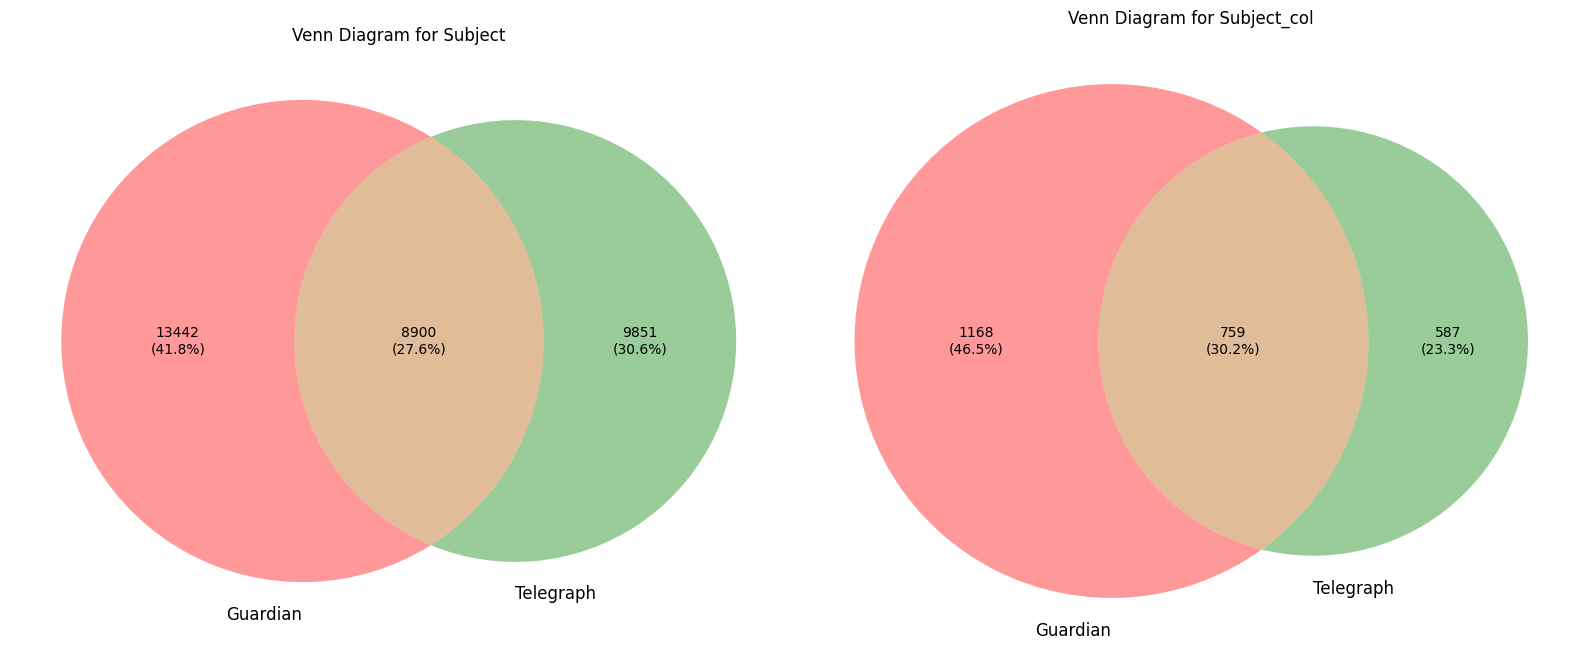

In [103]:
plot_venn_side_by_side(final_df_coref, 'Subject', final_df, 'Subject_col')

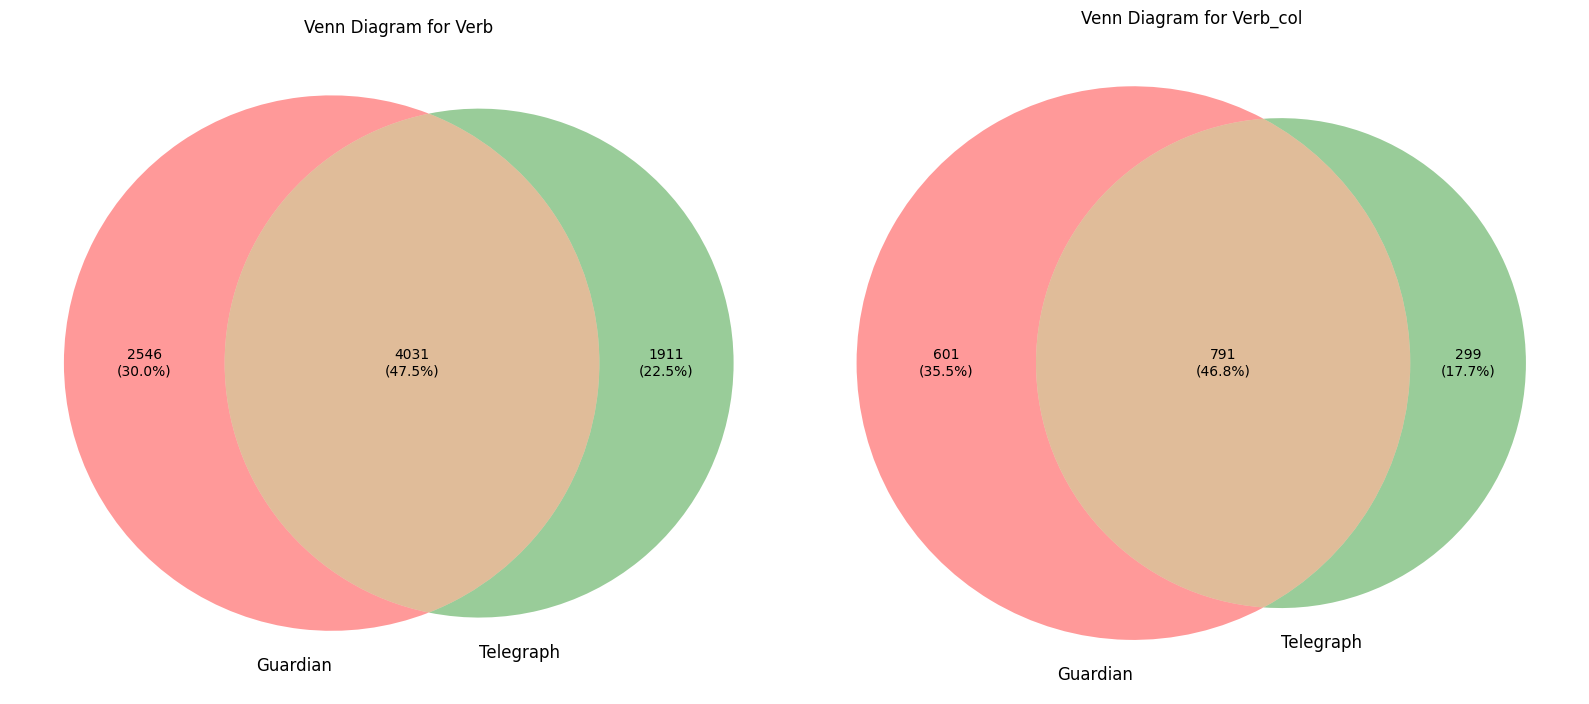

In [104]:
plot_venn_side_by_side(final_df_coref, 'Verb', final_df, 'Verb_col')

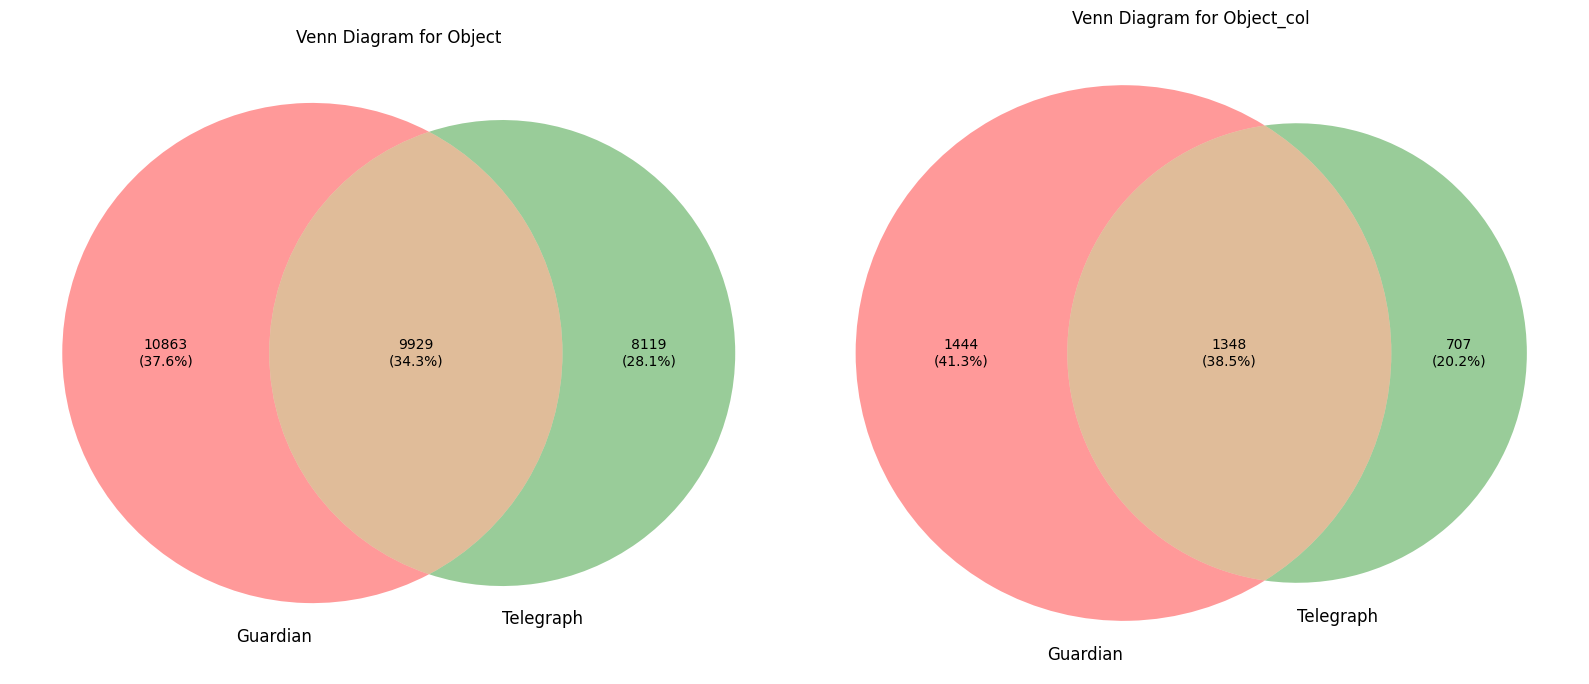

In [105]:
plot_venn_side_by_side(final_df_coref, 'Object', final_df, 'Object_col')

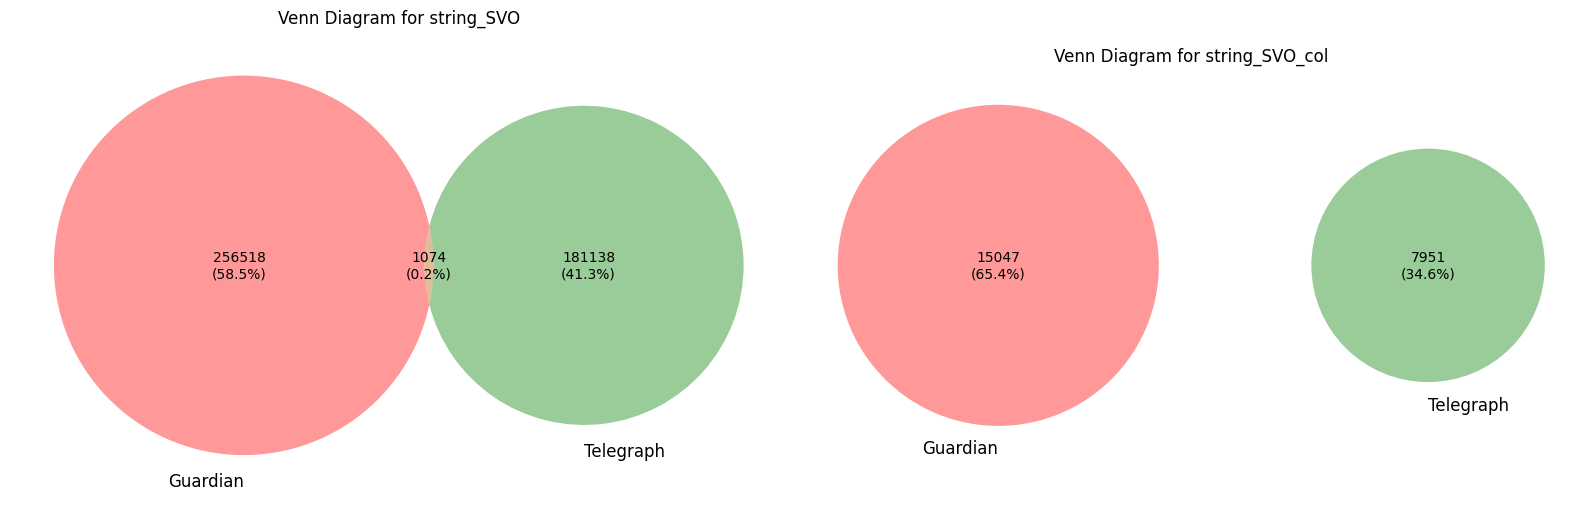

In [106]:
plot_venn_side_by_side(final_df_coref, 'string_SVO', final_df, 'string_SVO_col')

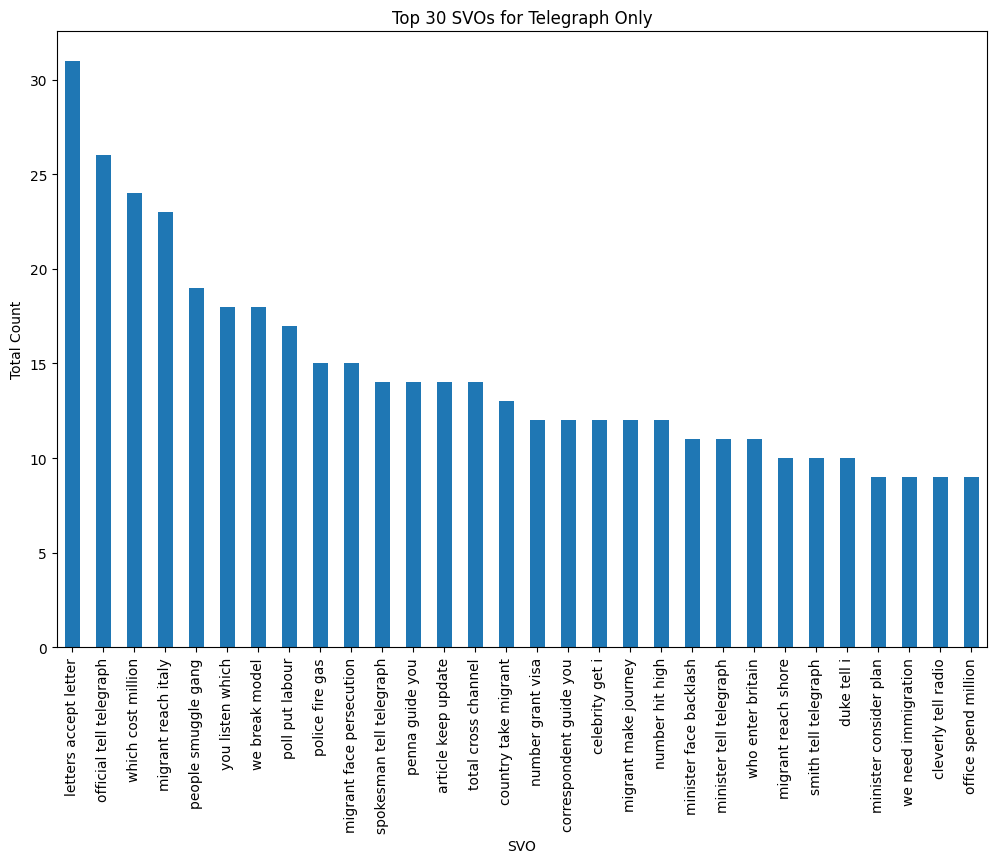

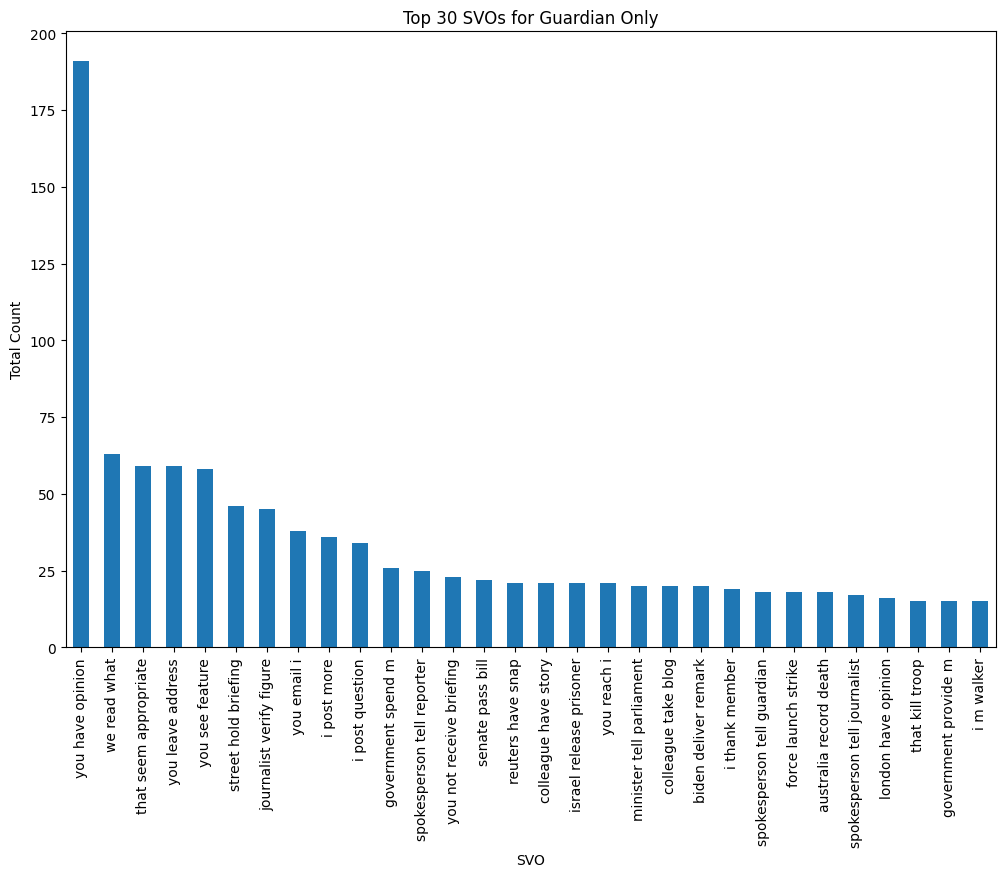

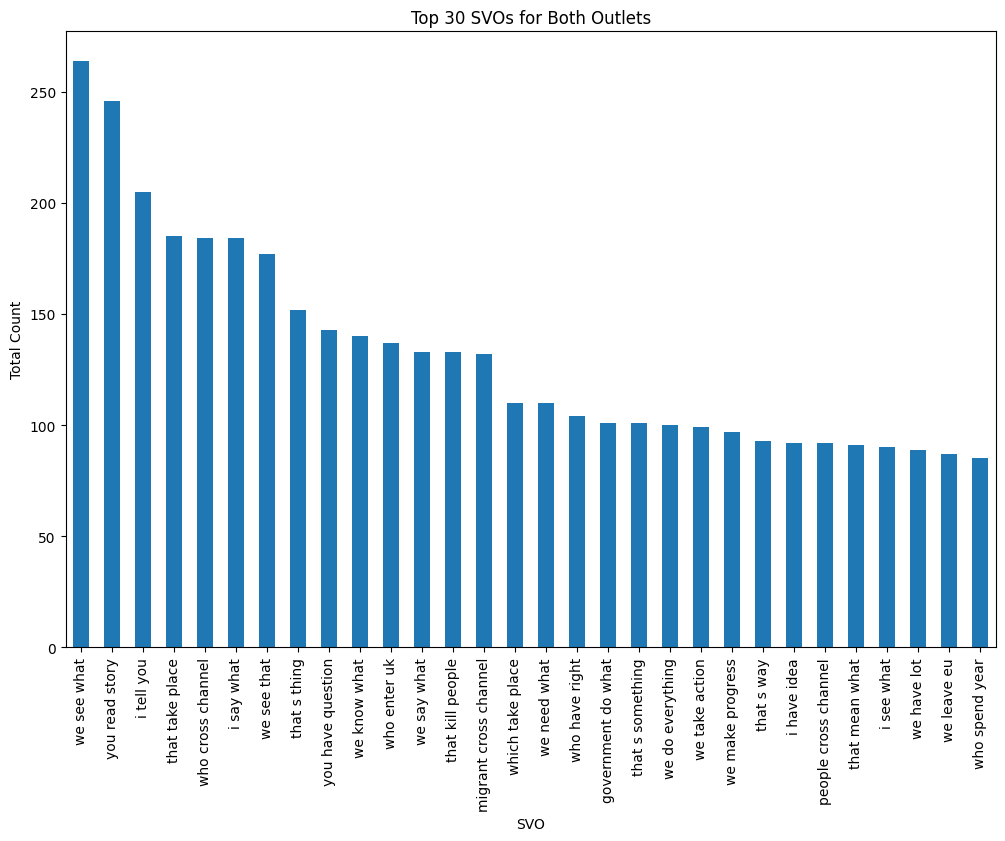

In [107]:
# Creating histograms with most frequent SVOs in each

import pandas as pd
import matplotlib.pyplot as plt


# Split the data into three parts based on the outlet
df_telegraph = final_df[final_df['Outlet'] == 'telegraph']
df_guardian = final_df[final_df['Outlet'] == 'guardian']
df_both = final_df[final_df['Outlet'] == 'both']

# Function to plot top 30 SVOs
def plot_top_svos(df, title):
    # Group by SVO strings, sum the counts, sort them, and take the top 30
    top_svos = df.groupby('string_SVO_col')['Total_Count'].sum().sort_values(ascending=False).head(30)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    top_svos.plot(kind='bar')
    plt.title(f'Top 30 SVOs for {title}')
    plt.ylabel('Total Count')
    plt.xlabel('SVO')
    plt.xticks(rotation=90)  # Rotate labels to avoid overlap
    plt.show()

# Plot for each outlet
plot_top_svos(df_telegraph, 'Telegraph Only')
plot_top_svos(df_guardian, 'Guardian Only')
plot_top_svos(df_both, 'Both Outlets')


### Clustering Strings

In [5]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('final_df_new')

In [13]:
final_df = df

In [15]:
final_df

,Unnamed: 0,SVO,EU_Mentions,NonEU_Mentions,GN_Mentions,GS_Mentions,Total_Count,n_articles,Outlet,Subject,...,string_SVO_col,string_SVO,llm_string_embedding,string_normalized_embedding,subject_bert_embeddings,verb_bert_embeddings,object_bert_embeddings,norm_subject_bert_embedding,norm_verb_bert_embedding,norm_object_bert_embedding
0,0,"('1', 'deem', 'informal')",0,20,6,10,2,1,guardian,1,...,1 deem formal,1 deem informal,[-4.86318111e-01 -9.19399336e-02 1.24486780e+...,[-2.91091744e-02 -5.50317904e-03 7.45131075e-...,[-7.14392066e-02 -3.89278680e-02 -2.24192932e-...,[ 2.36334056e-01 -3.80890578e-01 -1.69516116e-...,[ 4.09466438e-02 -9.78871807e-02 -1.91182733e-...,[-8.02830141e-03 -4.37469361e-03 -2.51946859e-...,[ 2.78260391e-02 -4.48461659e-02 -1.99588761e-...,[ 4.80420794e-03 -1.14849554e-02 -2.24311817e-...
1,1,"('1,000', 'reach', 'uk')",1,2,1,1,2,2,telegraph,"1,000",...,"1,000 reach uk","1,000 reach uk",[-0.31033126 0.4881851 0.40473557 0.137942...,[-0.01861576 0.02928463 0.02427877 0.008274...,[-1.37987167e-01 2.99086660e-01 -9.37004387e-...,[ 9.88843217e-02 -1.34363130e-01 -7.52402470e-...,[ 1.94782272e-01 -1.62439898e-01 -2.87483960e-...,[-1.50462389e-02 3.26126665e-02 -1.02171758e-...,[ 1.14650279e-02 -1.55785764e-02 -8.72364268e-...,[ 2.19452940e-02 -1.83014162e-02 -3.23895998e-...
2,2,"('1,842', 'leave', 'resident')",15,51,24,30,3,1,guardian,"1,842",...,"1,842 leave resident","1,842 leave resident",[-4.63373333e-01 6.18076444e-01 1.80687219e-...,[-2.82325018e-02 3.76582853e-02 1.10089472e-...,[ 1.13329686e-01 -2.16100365e-02 -1.40622571e-...,[ 2.00235054e-01 2.23859966e-01 -1.87503710e-...,[ 9.41115990e-02 9.49696675e-02 -1.99670032e-...,[ 1.26265893e-02 -2.40767491e-03 -1.56674162e-...,[ 2.37872787e-02 2.65938416e-02 -2.22748350e-...,[ 1.09753422e-02 1.10754101e-02 -2.32856199e-...
3,3,"('1,850', 'make', 'crossing')",2,14,2,13,2,2,telegraph,"1,850",...,"1,850 make crossing","1,850 make crossing",[-1.40343323e-01 7.39144504e-01 2.69560248e-...,[-8.64836667e-03 4.55482490e-02 1.66110918e-...,[ 5.63413724e-02 1.50897950e-01 -2.31097788e-...,[ 3.35867524e-01 8.65492225e-03 -1.34918019e-...,[ 1.01176910e-01 7.64177218e-02 -2.38696769e-...,[ 6.34007063e-03 1.69804823e-02 -2.60053352e-...,[ 3.75366993e-02 9.67277796e-04 -1.50784953e-...,[ 1.22428769e-02 9.24689975e-03 -2.88834199e-...
4,4,"('10', 'block', 'reappointment')",0,5,1,4,4,3,both,10,...,10 block reappointment,10 block reappointment,[-6.33548617e-01 4.45540309e-01 7.27647781e-...,[-3.88854966e-02 2.73460560e-02 4.46610488e-...,[ 1.21873021e-01 9.57378820e-02 9.18907151e-...,[ 7.63842240e-02 -9.88371074e-02 -3.59068990e-...,[-1.60404354e-01 -4.38169450e-01 -2.57102847e-...,[ 1.37532055e-02 1.08038904e-02 1.03697432e-...,[ 8.74459743e-03 -1.13150422e-02 -4.11068350e-...,[-1.50562515e-02 -4.11284938e-02 -2.41327938e-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39310,39310,"('zealand', 'see', 'growth')",0,4,4,0,2,2,both,zealand,...,zealand see growth,zealand see growth,[ 5.84411509e-02 -7.80957222e-01 1.84164107e+...,[ 3.48387053e-03 -4.65554483e-02 1.09786324e-...,[ 1.23274624e-01 3.11429724e-02 -8.87526870e-...,[ 2.78038353e-01 1.16458841e-01 -1.98191345e-...,[ 1.00069046e-01 -1.52265474e-01 -7.51005188e-...,[ 1.46624101e-02 3.70417722e-03 -1.05563356e-...,[ 3.24110687e-02 1.35756647e-02 -2.31032632e-...,[ 1.14381853e-02 -1.74043905e-02 -8.58420972e-...
39311,39311,"('zhou', 'tell', 'officer')",0,4,0,0,2,1,guardian,zhou,...,zhou tell officer,zhou tell officer,[ 2.19352722e-01 6.11108899e-01 1.66590571e+...,[ 1.40832923e-02 3.92355509e-02 1.06957577e-...,[-9.03823748e-02 -3.46503228e-01 -1.24962084e-...,[ 1.78530648e-01 -4.20596898e-02 -3.01979274e-...,[-2.46554613e-03 1.01755947e-01 -1.24121852e-...,[-1.02485754e-02 -3.92904542e-02 -1.41696138e-...,[ 1.98780168e-02 -4.68302332e-03 -3.36230733e-...,[-2.87223113e-04 1.18540311e-02 -1.44595411e-...
39312,39312,"('zimmerman', 'have', 'what')",0,14,10,2,2,1,guardian,zimmerman

In [16]:
from sklearn.preprocessing import normalize

string_embeddings_array = np.stack(final_df['llm_string_embedding'].values)
string_normalized_embeddings = normalize(string_embeddings_array)
final_df['string_normalized_embedding'] = list(string_normalized_embeddings)

ValueError: could not convert string to float: '[-4.86318111e-01 -9.19399336e-02  1.24486780e+00  5.20250142e-01\n -2.01962460e-02 -6.66274488e-01  3.33871394e-01  5.17862104e-02\n  2.47418389e-01 -1.38252005e-01 -6.25824749e-01  4.54929918e-01\n  2.88913678e-02 -1.72575638e-01  5.57847261e-01  5.89215457e-01\n -7.87937403e-01 -5.16555794e-02  5.64385593e-01 -1.81079671e-01\n -4.53434736e-01  4.78848487e-01 -1.89471543e-01 -1.06542814e+00\n -1.39978126e-01 -1.20721400e+00  2.25218430e-01 -1.09990072e+00\n -4.70026821e-01  6.69382334e-01  3.25905949e-01 -1.36816394e+00\n  4.69269663e-01 -3.83386612e-01  1.70340195e-01  4.56813246e-01\n  8.30531791e-02  2.35650063e-01  2.84792576e-02 -6.55736208e-01\n  1.27947724e+00 -9.82985720e-02  2.33371451e-01 -3.99328440e-01\n -9.65520382e-01 -7.03111172e-01  9.79148448e-02  2.25636885e-01\n  9.03505087e-02 -1.22102308e+00 -1.32841289e+00 -3.31578702e-01\n  4.58255224e-02  6.27084792e-01 -1.56982556e-01 -1.12076491e-01\n -5.44452012e-01 -4.40360993e-01 -2.31262669e-01  2.32485354e-01\n  6.23429008e-02 -8.21737424e-02  1.01088941e+00  1.89207360e-01\n  1.35194242e-01  6.82416201e-01  7.36268088e-02 -5.13168275e-01\n -7.80816019e-01  8.27959359e-01  8.56441677e-01 -3.49492021e-02\n -8.05993006e-02  3.38361740e-01 -1.12371337e+00  5.27453385e-02\n  8.61652866e-02  3.33394855e-01  1.72730938e-01  1.10338652e+00\n  2.46987447e-01 -1.89392552e-01  5.28519332e-01  2.20945939e-01\n -9.41937208e-01  7.79813707e-01  4.67749208e-01  4.40621883e-01\n -8.87812316e-01 -1.87892154e-01  4.41819020e-02  3.06581974e-01\n  6.85455084e-01  2.43157744e-01  1.61152199e-01 -7.50653327e-01\n -1.22606792e-01  5.07674962e-02  8.37030888e-01 -5.74556589e-01\n  7.97855034e-02 -2.50002563e-01 -2.93594390e-01 -4.18761879e-01\n  1.90692529e-01 -3.88763338e-01 -1.29188821e-01  1.15813941e-01\n  4.76752549e-01  2.99896568e-01 -4.07723039e-01 -7.21364975e-01\n  7.86131084e-01  4.96085495e-01 -8.91609013e-01  4.56879884e-01\n -8.69930983e-01 -4.45293099e-01  4.86065559e-02  9.21421528e-01\n  2.22545028e-01  7.15332985e-01 -7.09640324e-01 -4.35816497e-01\n  6.45171642e-01 -4.93783951e-01  2.02104002e-02  6.39621973e-01\n -1.21468961e+00 -2.14841515e-02 -4.72358793e-01  9.13994536e-02\n  3.79068285e-01  3.43708754e-01  1.62552798e-03 -4.41362590e-01\n  1.05390811e+00  7.68983588e-02 -3.45356911e-02  1.64105833e-01\n -8.51357281e-01  6.85761452e-01  4.13075924e-01 -2.19045635e-02\n  3.21061134e-01 -7.84583390e-02  8.18803549e-01 -8.06496963e-02\n -3.88514310e-01 -4.48563434e-02 -4.89895910e-01  6.72546685e-01\n -3.62001330e-01 -1.07151473e+00 -9.34679210e-01  2.49848023e-01\n -1.64680332e-01  8.76788914e-01  9.16906893e-02 -1.03356518e-01\n -3.93856734e-01  5.92077911e-01  3.35142642e-01  1.34771481e-01\n  5.00247121e-01  2.12410048e-01  1.73319653e-01  1.17351258e+00\n  1.13299084e+00  1.55850932e-01  1.03901732e+00 -1.09948862e+00\n  1.43941671e-01  7.20562756e-01 -2.57485420e-01  4.26068455e-01\n  4.97310869e-02  1.39576232e+00  7.44074285e-01 -7.94276237e-01\n -4.09246951e-01  8.83502424e-01  1.05578732e+00 -1.19388723e+00\n -1.84353769e-01 -1.63630709e-01 -4.10469085e-01  1.67230427e-01\n -1.19257361e-01 -1.60948455e-01  8.35778952e-01  1.32481396e-01\n  1.24201126e-01 -1.24014843e+00  2.40291297e-01  2.89172798e-01\n -6.43502548e-03  5.20915926e-01 -1.24620426e+00  7.40948617e-01\n  1.53143466e+00 -5.51329911e-01  7.34962747e-02 -1.56235456e-01\n  5.76303363e-01  8.86149347e-01 -5.26708364e-01  9.68241990e-01\n  7.72104636e-02 -9.80911493e-01 -3.81351948e-01 -4.17130321e-01\n  7.50225067e-01  9.00336266e-01 -9.82344151e-02 -5.86846292e-01\n  1.11552322e+00 -1.17159283e+00 -3.29060525e-01 -3.96174759e-01\n  6.57916605e-01  8.44395816e-01 -8.16319361e-02  1.06582510e+00\n -2.86272168e-01 -2.41577402e-01  6.31525755e-01 -6.52568877e-01\n -4.03256565e-01 -1.43886507e-02  2.24495843e-01 -2.57808656e-01\n -1.64086208e-01  2.70702869e-01  1.10541940e+00 -1.81143418e-01\n  1.54888391e-01 -2.90062577e-01  3.71060938e-01  1.78299129e-01\n  2.68561333e-01  1.44291535e-01  2.07486346e-01  9.16046917e-01\n -1.34494305e+00 -4.13828790e-02  8.27637374e-01 -1.73199892e-01\n -7.83573925e-01  6.19829357e-01 -5.42907357e-01 -1.14941132e+00\n -9.88331717e-03 -2.26214945e-01 -1.42589569e-01 -6.00641221e-02\n -2.92389601e-01  3.77497643e-01 -2.88102716e-01  4.39896196e-01\n -9.30387154e-03  4.64476794e-01 -6.94779456e-01 -2.22426176e-01\n  7.39316046e-02 -3.15161437e-01 -4.72152121e-02  9.93782654e-02\n  4.21858281e-01  1.94027126e-01 -1.53853938e-01 -2.67872274e-01\n -3.64926338e-01 -2.85678208e-01 -6.89793900e-02 -2.62524128e-01\n  9.21137333e-01  4.44792897e-01 -8.87658894e-01 -1.86655715e-01\n  4.70896810e-01  4.07802910e-01 -1.66356945e+00  7.33345091e-01\n  3.44576359e-01 -4.69401747e-01  4.47162539e-01 -1.16667855e+00\n -2.07279876e-01 -9.80545878e-02 -1.30959883e-01 -5.21012127e-01\n  9.39248279e-02 -1.10314846e+00  9.92663801e-01 -5.30422926e-01\n  5.78878820e-01 -8.46573591e-01 -8.94160748e-01  5.86337388e-01\n -1.24800479e+00 -3.22628617e-01 -2.38736466e-01  4.24283385e-01\n -2.31885493e-01 -4.96914357e-01  1.03429735e-01 -5.10850489e-01\n -1.53616524e+00 -6.47411585e-01 -1.55343664e+00  1.21618152e-01\n -4.40892965e-01  6.84551895e-02  2.29273930e-01  2.41053641e-01\n -7.57481396e-01  6.57485962e-01  3.86259556e-01 -1.08796966e+00\n  3.85171056e-01  3.07865053e-01 -1.56605750e-01  1.81641623e-01\n  1.71351567e-01  3.38857174e-01 -2.54677743e-01  3.80913109e-01\n -6.32726133e-01 -3.66171054e-03  1.22773266e+00 -7.13382721e-01\n  3.32996219e-01  2.80513674e-01  2.66474217e-01  9.26774681e-01\n -6.27772987e-01 -8.13893974e-01  1.19807613e+00  5.85971594e-01\n -7.02385679e-02 -5.50893068e-01 -4.82276194e-02 -8.40914786e-01\n  1.97664344e+00 -2.29452237e-01 -2.16937006e-01 -4.22800303e-01\n  7.53813744e-01 -2.08797622e-02 -2.34206486e-02  3.99768472e-01\n -7.68271625e-01  7.89314985e-01 -1.99175775e-01 -4.90940005e-01\n  3.19418937e-01 -1.12674721e-01 -4.19657916e-01  5.90494454e-01\n  1.64858446e-01 -8.56855810e-01 -5.97589731e-01  7.28979170e-01\n -5.35311848e-02 -3.07363182e-01  1.44635275e-01  1.39936522e-01\n  1.24507248e+00  1.95731357e-01  5.32592595e-01 -9.94061410e-01\n  6.02697074e-01  3.67218226e-01 -7.55443275e-01  5.61657965e-01\n  3.09668332e-01 -4.85282898e-01  3.55823845e-01 -1.02706444e+00\n  4.56583530e-01 -1.01647830e+00  1.78429127e-01 -8.40357482e-01\n  4.86135155e-01  8.93626213e-01  5.60543478e-01 -3.84082586e-01\n -2.27059916e-01  1.16532587e-01  6.18678451e-01  4.14122492e-01\n  5.00230730e-01  7.42083967e-01  3.68882626e-01 -1.43459427e+00\n  1.03337371e+00  5.60704350e-01 -2.26900771e-01  5.37515938e-01\n -4.84151654e-02  5.83824396e-01  5.62476456e-01 -1.38661277e+00\n  8.65330279e-01 -1.21702683e+00  4.67316777e-01 -1.04912817e+00\n -1.35513544e+00  2.10876942e-01 -1.71428576e-01 -3.94745059e-02\n -6.22685313e-01 -2.42617786e-01 -9.63059247e-01  1.18964159e+00\n  1.95435047e-01 -1.42528737e+00  9.82632697e-01 -4.37984854e-01\n -4.07201618e-01 -4.20697898e-01 -2.16117799e-01 -1.11196876e-01\n -4.72922891e-01  3.99857163e-01 -2.20348135e-01  2.65483350e-01\n  1.67723373e-01  1.07016660e-01 -2.96914369e-01 -8.33540261e-02\n -1.27525330e+00  1.30290473e+00 -5.62135875e-01 -5.80826283e-01\n -6.45720422e-01 -2.82206357e-01 -1.65022612e-01  2.24083066e-01\n  2.22460225e-01 -2.73912996e-01 -2.34909132e-02  8.01759064e-01\n -4.28110808e-01  2.16499940e-01 -5.20529330e-01  9.66175795e-02\n  7.39575624e-01 -7.66972780e-01  5.21458447e-01  5.39902508e-01\n  4.84518886e-01 -4.23929811e-01  5.67307770e-01 -1.41932473e-01\n  4.19430882e-01  1.41199842e-01  1.04881728e+00 -5.12343824e-01\n  2.20118523e-01 -6.80025518e-01 -8.11920822e-01  4.22905982e-02\n -1.02230340e-01  1.11193717e-01 -1.14782858e+00  2.18591392e-01\n -2.74462312e-01  7.01937914e-01  1.99645996e-01 -2.90277004e-01\n  8.30829382e-01 -2.01739892e-02 -3.87678862e-01  6.88684464e-01\n -2.39343143e+00 -1.60106029e-02  5.06608784e-01  3.35898668e-01\n -7.33591557e-01  2.26344034e-01 -2.40895107e-01 -8.16348344e-02\n -5.05877078e-01  5.26846111e-01  5.08215904e-01  1.64283440e-01\n  6.84197426e-01 -1.43509910e-01 -1.02876163e+00 -5.71524382e-01\n -8.46353471e-01 -7.07670271e-01  2.20948204e-01  6.00680888e-01\n -5.19235909e-01 -3.84985000e-01  1.00242352e+00 -2.38010064e-01\n -4.31427747e-01  3.71231794e-01 -4.52676147e-01 -7.84671128e-01\n  6.60987139e-01  4.56164360e-01 -1.17217422e+00  6.13221705e-01\n  2.28799567e-01 -4.68483530e-02 -9.59692776e-01  4.00133699e-01\n -4.26701009e-02  1.37684926e-01 -2.33402893e-01 -8.36501598e-01\n -1.03926338e-01  3.79323244e-01  4.44113202e-02 -1.18092549e+00\n -1.42942563e-01 -3.69797468e-01 -2.79596090e-01 -1.03571808e+00\n -1.16351031e-01 -9.44299400e-02  4.62990046e-01 -5.23519158e-01\n  5.32900333e-01  7.26042166e-02  2.00274706e-01 -3.14890385e-01\n -1.96346477e-01  3.63607377e-01  4.85439211e-01  6.28254414e-01\n -9.67868507e-01 -1.04959965e+00  3.58165264e-01  2.16562092e-01\n -1.12981774e-01  1.72379538e-01  3.43137950e-01 -4.20092791e-03\n -1.29307890e+00 -6.77315056e-01 -4.89402801e-01 -1.09217457e-01\n  5.59583485e-01 -6.93287313e-01 -1.23139329e-01 -1.80929735e-01\n -9.82890129e-01 -1.96400449e-01 -1.20792337e-01 -6.74306154e-01\n  6.03107154e-01  1.42280209e+00  1.51458219e-01 -6.91358507e-01\n  4.54361647e-01  3.26952308e-01 -5.35512090e-01  4.65370417e-01\n  2.58431938e-02  3.06843013e-01 -9.77628231e-02  2.25062445e-01\n  9.67579409e-02  4.57452536e-02 -1.74547434e-01 -4.36834335e-01\n -2.06280410e-01  7.85796642e-01 -1.28077877e+00  2.29814336e-01\n  9.22148466e-01  1.63584396e-01 -1.04627037e+00 -5.22700369e-01\n  2.08824739e-01  2.66058296e-01 -9.30385292e-02 -7.25089967e-01\n -1.07768619e+00  1.07828772e+00  4.64452028e-01 -7.24066257e-01\n -1.80901214e-02  5.59792995e-01  7.25419998e-01 -1.95254102e-01\n  3.49238485e-01 -3.79666895e-01  4.91824895e-01  1.81136325e-01\n -4.78321463e-01  1.58664644e+00 -2.47163668e-01  7.01921701e-01\n -2.43534967e-01 -3.45691234e-01 -8.63612473e-01  6.11907065e-01\n -5.02301037e-01  6.15979135e-01 -5.69092572e-01  6.42644346e-01\n  2.88444042e-01  5.21250069e-01  7.63050094e-02 -3.50375742e-01\n -4.74634051e-01  4.97857362e-01 -6.37813434e-02 -1.53083384e+00\n  5.34836650e-02 -3.34467925e-02  4.87179190e-01  6.36372268e-01\n -5.61917424e-02  2.07006093e-02 -8.64304960e-01 -8.16509202e-02\n  3.38241786e-01 -4.04539734e-01 -3.04290444e-01 -1.51994228e-01\n -9.17366669e-02  1.43946156e-01  3.84781331e-01  4.48445886e-01\n  6.20159626e-01 -1.89086437e-01  7.01235712e-01  1.48027062e-01\n -3.57791692e-01  3.04324061e-01  9.48488772e-01  7.63099015e-01\n  1.85362279e-01 -6.90884173e-01  4.10216421e-01 -4.38307285e-01\n  2.71027058e-01 -2.55373511e-02  1.37656227e-01  1.22292316e+00\n  9.22550261e-01  3.46322745e-01  2.53055602e-01 -7.19966352e-01\n -2.55782217e-01  2.71068454e-01  3.67542118e-01 -4.32480186e-01\n  3.87334555e-01  8.42239335e-02  2.25969180e-01 -5.28833568e-01\n  7.60849655e-01  2.02330932e-01 -3.40841651e-01 -3.44238728e-01\n  3.41015458e-01  5.24592400e-01 -4.19357978e-02 -3.02832276e-01\n -6.54807508e-01 -7.72885621e-01  4.53046203e-01  1.34296894e-01\n  1.78323567e-01 -1.33059108e+00 -4.84508276e-01  7.30902374e-01\n  8.41684878e-01  1.96045443e-01 -8.70681286e-01 -2.01314986e-01\n  3.28820378e-01  6.73851311e-01 -4.43378419e-01 -1.68433607e-01\n -4.21935320e-01  6.10169113e-01  1.04807115e+00  3.97795916e-01\n -2.39780992e-02 -6.03019834e-01  3.61131936e-01  4.00272518e-01\n -8.55521858e-02 -1.69092810e+00  3.15360785e-01  5.05907297e-01\n  3.87310833e-01  1.67330742e-01  9.84346688e-01 -5.37777007e-01\n -9.89330769e-01  7.20486045e-02 -1.29357445e+00  6.35851443e-01\n -4.30372596e-01 -9.12621975e-01 -8.10058296e-01 -7.55132020e-01\n -5.00061393e-01  8.83534431e-01  2.80553430e-01  1.73656091e-01\n  1.38228789e-01  1.06129658e+00 -1.37115791e-01  1.39048755e+00\n -1.80330753e-01 -1.43139511e-01  1.65975884e-01 -2.43971631e-01\n -7.47686863e-01  3.52310330e-01 -2.65104383e-01  9.91452992e-01\n -2.02995315e-01  1.47277847e-01  1.65104985e-01  1.94146588e-01\n -8.00812244e-01 -5.69914401e-01 -3.44972819e-01  1.29907981e-01\n  1.59921050e-01  1.14754392e-02  1.18505156e+00 -8.68714824e-02\n -3.09311897e-01  4.23757166e-01 -1.05522566e-01 -8.24287459e-02\n -8.56765080e-03  4.72205073e-01  5.97759426e-01  1.26785830e-01\n -1.07426047e+00 -2.58616477e-01 -5.99365473e-01  4.40418035e-01\n -5.78033030e-01  1.66913271e-01  2.06997558e-01  2.31590141e-02\n -4.76037264e-01 -1.07159173e+00 -1.63148248e+00 -3.75380784e-01\n -1.34925985e+00 -5.56852162e-01  3.67083073e-01 -3.12945485e-01\n  1.07951140e+00 -3.37471843e-01 -2.76997417e-01 -5.20548701e-01\n -4.89644140e-01  8.93582702e-02 -1.09264113e-01  4.66983199e-01]'

In [109]:
import hdbscan
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from joblib import Parallel, delayed

def compute_distances(chunk, embeddings):
    return 1 - cosine_similarity(chunk, embeddings)

def parallel_cosine_similarity(embeddings, n_jobs=4):
    # Split the embeddings into chunks for parallel processing
    chunk_size = int(np.ceil(len(embeddings) / n_jobs))
    chunks = [embeddings[i:i + chunk_size] for i in range(0, len(embeddings), chunk_size)]
    
    # Compute distances in parallel
    results = Parallel(n_jobs=n_jobs)(delayed(compute_distances)(chunk, embeddings) for chunk in chunks)
    
    # Concatenate the results
    return np.vstack(results)

# Calculate cosine distance matrix in parallel
cosine_dist_matrix = parallel_cosine_similarity(string_normalized_embeddings, n_jobs=4)

# Ensure the matrix is of type float64
cosine_dist_matrix = cosine_dist_matrix.astype(np.float64)

# Fitting HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=70, min_samples=70, alpha=0.3, metric='precomputed', cluster_selection_method='leaf')
cluster_labels = clusterer.fit_predict(cosine_dist_matrix)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print(f"Total number of clusters (excluding noise): {num_clusters}")
final_df['hdb_string_clusters'] = cluster_labels

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Total number of clusters (excluding noise): 43


In [ ]:
final_df.to_csv('final_clustered_data')

In [110]:
len(cluster_labels)


39155

In [111]:
final_df['hdb_string_clusters'] = cluster_labels

In [112]:
grouped = final_df.groupby('hdb_string_clusters')

for cluster_label, group in grouped:
    print(f"Cluster {cluster_label}:")
    # Print the SVOs in the current cluster
    print(group['SVO'].tolist())
    print("\n")

Cluster -1:
["('1', 'deem', 'informal')", "('1,000', 'reach', 'uk')", "('1,842', 'leave', 'resident')", "('1,850', 'make', 'crossing')", "('10', 'block', 'reappointment')", "('10', 'discuss', 'possibility')", "('10', 'get', 'sort')", "('10', 'not have', 'plan')", "('10', 'not tell', 'truth')", "('10', 'reject', 'call')", "('10', 'reject', 'suggestion')", "('10', 'say', 'what')", "('10', 'tell', 'mps')", "('10', 'tell', 'you')", "('16,000', 'claim', 'asylum')", "('10,000', 'cross', 'channel')", "('17,000', 've', 'idea')", "('11', 'have', 'thought')", "('11,100', 'grant', 'visa')", "('13', 'report', 'effect')", "('15', 'show', 'evidence')", "('19', 'receive', 'dose')", "('1976', 'tell', 'i')", "('1998', 'total', 'increase')", "('20', 'support', 'side')", "('20,000', 'reach', 'uk')", "('2005', 'become', 'couple')", "('2011', 'have', 'middleclass')", "('2015', 'fight', 'deportation')", "('240', 'take', 'hostage')", "('249', 'kill', 'combatant')", "('25', 'speak', 'language')", "('26', 'sho

In [113]:
final_df

,SVO,EU_Mentions,NonEU_Mentions,GN_Mentions,GS_Mentions,Total_Count,n_articles,Outlet,Subject,Verb,...,string_SVO,llm_string_embedding,string_normalized_embedding,subject_bert_embeddings,verb_bert_embeddings,object_bert_embeddings,norm_subject_bert_embedding,norm_verb_bert_embedding,norm_object_bert_embedding,hdb_string_clusters
0,"('1', 'deem', 'informal')",0,20,6,10,2,1,guardian,1,deem,...,1 deem informal,"[-0.4863181, -0.09193993, 1.2448678, 0.5202501...","[-0.029109174, -0.005503179, 0.07451311, 0.031...","[-0.07143921, -0.038927868, -0.22419293, -0.08...","[0.23633406, -0.38089058, -0.16951612, -0.2538...","[0.040946644, -0.09788718, -0.19118273, -0.064...","[-0.008028301, -0.0043746936, -0.025194686, -0...","[0.02782604, -0.044846166, -0.019958876, -0.02...","[0.004804208, -0.011484955, -0.022431182, -0.0...",-1
1,"('1,000', 'reach', 'uk')",1,2,1,1,2,2,telegraph,"1,000",reach,...,"1,000 reach uk","[-0.31033126, 0.4881851, 0.40473557, 0.1379424...","[-0.01861576, 0.029284632, 0.024278767, 0.0082...","[-0.13798717, 0.29908666, -0.09370044, -0.0354...","[0.09888432, -0.13436313, -0.07524025, -0.0058...","[0.19478227, -0.1624399, -0.28748396, -0.26213...","[-0.015046239, 0.032612666, -0.010217176, -0.0...","[0.011465028, -0.015578576, -0.008723643, -0.0...","[0.021945294, -0.018301416, -0.0323896, -0.029...",-1
2,"('1,842', 'leave', 'resident')",15,51,24,30,3,1,guardian,"1,842",leave,...,"1,842 leave resident","[-0.46337333, 0.61807644, 0.18068722, 0.135259...","[-0.028232502, 0.037658285, 0.011008947, 0.008...","[0.113329686, -0.021610036, -0.14062257, -0.25...","[0.20023505, 0.22385997, -0.18750371, -0.16507...","[0.0941116, 0.09496967, -0.19967003, -0.091784...","[0.012626589, -0.002407675, -0.015667416, -0.0...","[0.023787279, 0.026593842, -0.022274835, -0.01...","[0.010975342, 0.01107541, -0.02328562, -0.0107...",-1
3,"('1,850', 'make', 'crossing')",2,14,2,13,2,2,telegraph,"1,850",make,...,"1,850 make crossing","[-0.14034332, 0.7391445, 0.26956025, 0.2308627...","[-0.008648367, 0.04554825, 0.016611092, 0.0142...","[0.056341372, 0.15089795, -0.23109779, -0.2264...","[0.33586752, 0.008654922, -0.13491802, 0.03722...","[0.10117691, 0.07641772, -0.23869677, -0.00498...","[0.0063400706, 0.016980482, -0.026005335, -0.0...","[0.0375367, 0.0009672778, -0.015078495, 0.0041...","[0.012242877, 0.0092469, -0.02888342, -0.00060...",-1
4,"('10', 'block', 'reappointment')",0,5,1,4,4,3,both,10,block,...,10 block reappointment,"[-0.6335486, 0.4455403, 0.7276478, 0.3092134, ...","[-0.038885497, 0.027346056, 0.04466105, 0.0189...","[0.12187302, 0.09573788, 0.091890715, -0.05012...","[0.076384224, -0.09883711, -0.359069, -0.01623...","[-0.16040435, -0.43816945, -0.25710285, -0.025...","[0.013753206, 0.01080389, 0.010369743, -0.0056...","[0.008744597, -0.011315042, -0.041106835, -0.0...","[-0.015056252, -0.041128494, -0.024132794, -0....",-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39310,"('zealand', 'see', 'growth')",0,4,4,0,2,2,both,zealand,see,...,zealand see growth,"[0.05844115, -0.7809572, 1.8416411, 0.22565015...","[0.0034838705, -0.04655545, 0.109786324, 0.013...","[0.123274624, 0.031142972, -0.08875269, 0.1967...","[0.27803835, 0.11645884, -0.19819134, -0.19988...","[0.100069046, -0.15226547, -0.07510052, 0.1107...","[0.01466241, 0.0037041772, -0.010556336, 0.023...","[0.03241107, 0.013575665, -0.023103263, -0.023...","[0.011438185, -0.01740439, -0.00858421, 0.0126...",-1
39311,"('zhou', 'tell', 'officer')",0,4,0,0,2,1,guardian,zhou,tell,...,zhou tell officer,"[0.21935272, 0.6111089, 1.6659057, 0.5729201, ...","[0.014083292, 0.03923555, 0.10695758, 0.036783...","[-0.090382375, -0.34650323, -0.124962084, -0.0...","[0.17853065, -0.04205969, -0.30197927, -0.2423...","[-0.0024655461, 0.10175595, -0.12412185, 0.103...","[-0.010248575, -0.039290454, -0.014169614, -0....","[0.019878017, -0.0046830233, -0.033623073, -0....","[-0.0002872231, 0.011854031, -0.014459541, 0.0...",-1
39312,"('zimmerm

In [124]:
# Table with example SVOs and outlet proportions (top 5 most frequent SVOs per cluster)

def calculate_aggregations(df):
    # Group by 'hdb_string_clusters'
    grouped = df.groupby('hdb_string_clusters')
    # Calculate outlet proportions
    outlet_counts = grouped['Outlet'].value_counts().unstack(fill_value=0)
    outlet_proportions = outlet_counts.div(outlet_counts.sum(axis=1), axis=0).round(2)
    # Calculate sums for other specified columns
    sums = grouped[['EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions', 'Total_Count', 'n_articles']].sum()
    # Combine the results into a single DataFrame
    combined = outlet_proportions.join(sums)
    return combined


def get_top_svos(df, n_top=5):
    # Group by 'hdb_string_clusters' and 'string_SVO', then count occurrences
    freq = df.groupby(['hdb_string_clusters', 'string_SVO']).size().reset_index(name='counts')
    # Sort within each cluster by count in descending order and get top N
    top_svos = freq.groupby('hdb_string_clusters').apply(
        lambda x: '\n'.join(x.sort_values('counts', ascending=False).head(n_top)['string_SVO'])
    ).reset_index(name='Top_SVOs')
    return top_svos

In [125]:
aggregated_data = calculate_aggregations(final_df)
top_svos = get_top_svos(final_df)
result_df = top_svos.merge(aggregated_data, on='hdb_string_clusters', how='left')

/tmp/ipykernel_3210186/522069353.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_svos = freq.groupby('hdb_string_clusters').apply(


In [126]:
result_df

,hdb_string_clusters,Top_SVOs,both,guardian,telegraph,EU_Mentions,NonEU_Mentions,GN_Mentions,GS_Mentions,Total_Count,n_articles
0,-1,"zone have lift\n1 deem informal\n1,000 reach u...",0.39,0.39,0.21,170533,605728,294914,334664,106483,95182
1,0,you have food\nauthority provide food\nbiden a...,0.53,0.33,0.14,309,1248,509,788,267,252
2,1,who support democrats\ndemocrats accuse govern...,0.27,0.54,0.19,140,968,338,491,181,166
3,2,you get flight\naircraft assist crew\nwe get f...,0.30,0.44,0.26,659,2881,1134,1862,313,255
4,3,who use republicans\nbiden accuse republicans\...,0.25,0.69,0.06,121,1206,372,535,190,165
5,4,who visit australia\nalex tell australia\nspok...,0.08,0.88,0.04,253,2388,1092,924,312,288
6,5,warsaw accuse putin\nagency quote putin\nbiden...,0.42,0.46,0.12,1499,2902,2019,1043,267,200
7,6,you see hundred\naccommodation cost million\na...,0.44,0.20,0.36,1189,4597,1980,2828,827,766
8,7,you spend year\naccomplice face year\nwhich ca...,0.51,0.28,0.21,605,1961,996,1120,493,474
9,8,you spend month\nbusiness have month\ncase tak...,0.61,0.21,0.17,349,1486,641,880,293,284


In [120]:
# # Table with example SVOs and outlet proportions (top 5 most frequent SVOs per cluster)

# def get_top_svos(df, n_top=5):
#     # Group by 'hdb_string_clusters' and 'SVO', then count occurrences
#     freq = df.groupby(['hdb_string_clusters', 'string_SVO']).size().reset_index(name='counts')
#     # Sort within each cluster by count in descending order and get top N
#     top_svos = freq.groupby('hdb_string_clusters').apply(
#         lambda x: '\n'.join(x.sort_values('counts', ascending=False).head(n_top)['string_SVO'])
#     ).reset_index(name='Top_SVOs')
#     return top_svos

# def calculate_outlet_proportions(df):
#     # Count the number of SVOs from each outlet in each cluster
#     outlet_counts = df.groupby(['hdb_string_clusters', 'Outlet']).size().unstack(fill_value=0)
#     # Calculate proportions
#     outlet_proportions = outlet_counts.div(outlet_counts.sum(axis=1), axis=0)
#     return outlet_proportions.round(2)  

# # Assuming final_df is your DataFrame with all necessary columns
# top_svos = get_top_svos(final_df)
# outlet_proportions = calculate_outlet_proportions(final_df)

# # Merge the top SVOs with their respective outlet proportions
# results_df = top_svos.merge(outlet_proportions, left_on='hdb_string_clusters', right_index=True, how='left')

/tmp/ipykernel_3210186/2057139387.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_svos = freq.groupby('hdb_string_clusters').apply(


In [127]:
result_df.to_csv('approach1_final.csv', index=False)

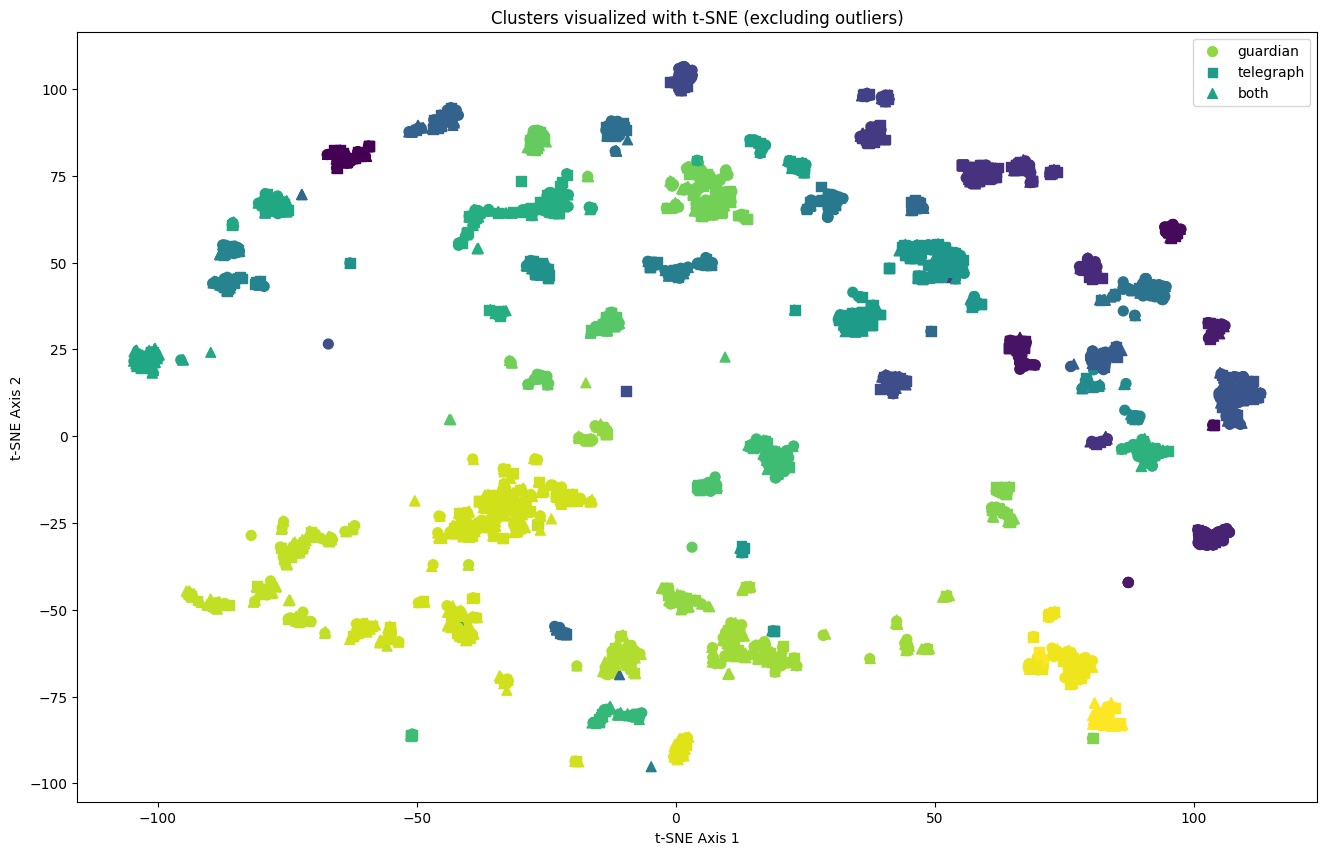

In [128]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Applying t-SNE to reduce dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_tsne = tsne.fit_transform(string_normalized_embeddings)

# Adding t-SNE coordinates to the DataFrame
final_df['tsne-2d-one'] = embeddings_tsne[:,0]
final_df['tsne-2d-two'] = embeddings_tsne[:,1]

# Don't want to plot cluster -1 (outliers)
filtered_df_no_outliers = final_df[final_df['hdb_string_clusters'] != -1]

# Define shapes for each outlet
outlet_marker_styles = {'guardian': 'o', 'telegraph': 's', 'both': '^'}

# Plot clusters with t-SNE coordinates
plt.figure(figsize=(16, 10))
for outlet, shape in outlet_marker_styles.items():
    outlet_df = filtered_df_no_outliers[filtered_df_no_outliers['Outlet'] == outlet]
    plt.scatter(outlet_df['tsne-2d-one'], outlet_df['tsne-2d-two'], 
                c=outlet_df['hdb_string_clusters'], cmap='viridis', marker=shape, s=50, label=outlet)

plt.title('Clusters visualized with t-SNE (excluding outliers)')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.legend()
plt.show()

In [129]:
# Proportion from each outlet in each cluster:
cluster_outlet_counts = final_df.groupby(['hdb_string_clusters', 'Outlet']).size().unstack(fill_value=0)
cluster_total_counts = cluster_outlet_counts.sum(axis=1)
cluster_outlet_proportions = cluster_outlet_counts.div(cluster_total_counts, axis=0)
cluster_outlet_proportions_rounded = cluster_outlet_proportions.round(2)
print(cluster_outlet_proportions_rounded)

Outlet               both  guardian  telegraph
hdb_string_clusters                           
-1                   0.39      0.39       0.21
 0                   0.53      0.33       0.14
 1                   0.27      0.54       0.19
 2                   0.30      0.44       0.26
 3                   0.25      0.69       0.06
 4                   0.08      0.88       0.04
 5                   0.42      0.46       0.12
 6                   0.44      0.20       0.36
 7                   0.51      0.28       0.21
 8                   0.61      0.21       0.17
 9                   0.27      0.65       0.08
 10                  0.49      0.28       0.23
 11                  0.39      0.48       0.13
 12                  0.25      0.68       0.06
 13                  0.60      0.25       0.15
 14                  0.64      0.16       0.20
 15                  0.52      0.31       0.17
 16                  0.32      0.62       0.06
 17                  0.34      0.49       0.17
 18          

In [130]:
# Now assessing cluster quality using Silhouette and DB Index
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Check the number of unique clusters excluding noise (-1 if used for outliers)
unique_clusters = np.unique(cluster_labels)
if -1 in unique_clusters:
    unique_clusters = unique_clusters[unique_clusters != -1] 

# Ensure there are at least two clusters excluding noise
if len(unique_clusters) > 1:
    valid_mask = cluster_labels != -1
    valid_labels = cluster_labels[valid_mask]
    valid_embeddings = string_normalized_embeddings[valid_mask]

    # Silhouette Score
    try:
        silhouette_avg = silhouette_score(valid_embeddings, valid_labels)
        print(f"Silhouette Score: {silhouette_avg}")
    except ValueError as e:
        print(f"Error calculating Silhouette Score: {e}")

    # Davies-Bouldin Score
    try:
        davies_bouldin = davies_bouldin_score(valid_embeddings, valid_labels)
        print(f"Davies-Bouldin Score: {davies_bouldin}")
    except ValueError as e:
        print(f"Error calculating Davies-Bouldin Score: {e}")
else:
    print("Not enough clusters to calculate Silhouette Score and Davies-Bouldin Score. Ensure more than one cluster is present excluding noise.")


Silhouette Score: 0.20297746360301971
Davies-Bouldin Score: 1.6353489202421072


In [131]:
from sklearn.cluster import KMeans

# Fitting K-Means on the dataset using the number of clusters found by HDBSCAN
kmeans = KMeans(n_clusters=len(set(cluster_labels)) - 1, random_state=42).fit(string_normalized_embeddings)

# Obtaining cluster centroids
centroids = kmeans.cluster_centers_

# Assigning labels based on centroids
clust_labels = {}
for i, centroid in enumerate(centroids):
    # Find the index of the closest data point to the centroid
    closest_index = np.argmin(np.linalg.norm(string_normalized_embeddings - centroid, axis=1))
    clust_labels[i] = final_df.iloc[closest_index]['SVO']

# Assigning labels to DataFrame
final_df['hdb_centroid_label'] = final_df['hdb_string_clusters'].apply(lambda x: clust_labels.get(x, 'Noise'))

print("Labels from centroids method:")
print(final_df['hdb_centroid_label'].unique())


Labels from centroids method:
['Noise' "('states', 'end', 'participation')"
 "('police', 'seize', 'worth')" "('republicans', 'have', 'vote')"
 "('i', 'get', 'thing')" "('that', 'take', 'we')"
 "('that', 'cause', 'crisis')" "('office', 'make', 'representation')"
 "('israel', 'claim', 'which')" "('government', 'make', 'approach')"
 "('president', 'make', 'claim')" "('million', 'make', 'available')"
 "('it', 'respect', 'period')" "('russia', 'ratchet', 'effort')"
 "('air', 'nationalise', 'cent')" "('we', 'need', 'approach')"
 "('we', 'have', 'response')" "('us', 'offer', 'support')"
 "('claim', 'take', 'year')" "('minister', 'deprive', 'fighter')"
 "('who', 'pay', 'money')" "('biden', 'describe', 'that')"
 "('policy', 'kill', 'people')" "('government', 'lose', 'sight')"
 "('party', 'take', 'result')" "('spokesperson', 'tell', 'telegraph')"
 "('that', 'hire', 'worker')" "('we', 'tell', 'man')"
 "('agency', 'have', 'migrant')" "('we', 'get', 'memorandum')"
 "('they', 'not take', 'they')" "(

In [132]:
# Obtaining cluster labels using kmedoids

from sklearn_extra.cluster import KMedoids

# Fitting K-Medoids on the dataset using the number of clusters found by HDBSCAN
kmedoids = KMedoids(n_clusters=len(set(cluster_labels)) - 1, random_state=42).fit(string_normalized_embeddings)
medoids_indices = kmedoids.medoid_indices_

# Assigning labels based on medoids
clust_labels = {i: final_df.iloc[idx]['SVO'] for i, idx in enumerate(medoids_indices)}
final_df['hdb_kmedoid_label'] = final_df['hdb_string_clusters'].apply(lambda x: clust_labels.get(x, 'Noise'))

print("Labels from medoids method:")
final_df['hdb_kmedoid_label'].unique()

Labels from medoids method:


array(['Noise', "('we', 'address', 'those')", "('you', 'contact', 'we')",
       "('we', 'have', 'consideration')",
       "('minister', 'send', 'people')", "('statement', 'have', 'place')",
       "('report', 'reveal', 'that')", "('person', 'tell', 'i')",
       "('that', 'have', 'policy')", "('minister', 'declare', 'that')",
       "('government', 'consider', 'that')",
       "('place', 'make', 'available')", "('we', 'not support', 'call')",
       "('we', 'become', 'point')", "('that', 'remind', 'we')",
       "('proposal', 'have', 'effect')", "('we', 'have', 'approach')",
       "('biden', 'describe', 'that')", "('use', 'become', 'hallmark')",
       "('consideration', 'label', 'those')", "('that', 'take', 'part')",
       "('we', 'issue', 'direction')", "('someone', 'tell', 'we')",
       "('someone', 'tell', 'i')", "('period', 'give', 'access')",
       "('states', 'end', 'participation')",
       "('that', 'show', 'support')", "('you', 'have', 'approach')",
       "('we', 'appro

In [133]:
# Function to get the top N representative SVOs for each cluster based on TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_svos_per_cluster_tfidf(df, cluster_col, svo_col, top_n=5):
    top_svos = {}

    # Group by the cluster column
    grouped = df.groupby(cluster_col)

    for cluster, group in grouped:
        svos = group[svo_col].values

        # Apply TF-IDF to these SVO strings
        tfidf_vectorizer = TfidfVectorizer(lowercase=False, tokenizer=lambda x: x.split('\n'))
        tfidf_matrix = tfidf_vectorizer.fit_transform(['\n'.join(svos)])

        # Get feature names (SVOs) and their corresponding TF-IDF scores
        feature_names = tfidf_vectorizer.get_feature_names_out()
        tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Sum along the columns and convert to a 1D array

        # Get the top N SVOs with the highest TF-IDF scores
        top_indices = tfidf_scores.argsort()[-top_n:][::-1]
        top_svos[cluster] = [(feature_names[idx], tfidf_scores[idx]) for idx in top_indices]

    return top_svos

In [134]:
optimal_k = num_clusters + 1
top_svos_per_cluster_tfidf = get_top_svos_per_cluster_tfidf(final_df, 'hdb_string_clusters', 'string_SVO', top_n=3)

# Print the results
for cluster, svos in top_svos_per_cluster_tfidf.items():
    print(f"Cluster {cluster}:")
    for svo, score in svos:
        print(f"  SVO: {svo}, TF-IDF Score: {score}")
    print()

Cluster -1:
  SVO: 1 deem informal, TF-IDF Score: 0.005493178960083819
  SVO: zone have lift, TF-IDF Score: 0.005493178960083819
  SVO: zion tell bbc, TF-IDF Score: 0.005493178960083819

Cluster 0:
  SVO: authority provide food, TF-IDF Score: 0.10314212462587934
  SVO: you have food, TF-IDF Score: 0.10314212462587934
  SVO: you have dinner, TF-IDF Score: 0.10314212462587934

Cluster 1:
  SVO: democrats accuse government, TF-IDF Score: 0.11952286093343936
  SVO: who support democrats, TF-IDF Score: 0.11952286093343936
  SVO: who accuse democrats, TF-IDF Score: 0.11952286093343936

Cluster 2:
  SVO: aircraft assist crew, TF-IDF Score: 0.10540925533894598
  SVO: you get flight, TF-IDF Score: 0.10540925533894598
  SVO: flight carry passenger, TF-IDF Score: 0.10540925533894598

Cluster 3:
  SVO: biden accuse republicans, TF-IDF Score: 0.11396057645963795
  SVO: who use republicans, TF-IDF Score: 0.11396057645963795
  SVO: who chastise republicans, TF-IDF Score: 0.11396057645963795

Cluster 

/data/scro4790/Telegraph/output/perigon_rerun/output/thesis/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Approach 2: Clustering S // V // O

In [6]:
final_df = pd.read_csv('final_df_new')

In [9]:
final_df.columns

Index(['Unnamed: 0', 'SVO', 'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions',
       'GS_Mentions', 'Total_Count', 'n_articles', 'Outlet', 'Subject', 'Verb',
       'Object', 'Subject_Embedding', 'Verb_Embedding', 'Object_Embedding',
       'norm_subject_embedding', 'norm_verb_embedding',
       'norm_object_embedding', 'Subject_col', 'Verb_col', 'Object_col',
       'string_SVO_col', 'string_SVO', 'llm_string_embedding',
       'string_normalized_embedding', 'subject_bert_embeddings',
       'verb_bert_embeddings', 'object_bert_embeddings',
       'norm_subject_bert_embedding', 'norm_verb_bert_embedding',
       'norm_object_bert_embedding'],
      dtype='object')

In [136]:
import numpy as np
# Dropping rows where subject// verb // or object have embedding 0

# Step 1: Define a function to check if an embedding is all zeros
def is_all_zeros(embedding):
    return np.all(embedding == 0)

# Step 2: Identify rows where any embedding is all zeros
final_df['subject_is_all_zeros'] = final_df['subject_bert_embeddings'].apply(is_all_zeros)
final_df['verb_is_all_zeros'] = final_df['verb_bert_embeddings'].apply(is_all_zeros)
final_df['object_is_all_zeros'] = final_df['object_bert_embeddings'].apply(is_all_zeros)

# Step 3: Filter out rows where any embedding is all zeros
final_df = final_df[~(final_df['subject_is_all_zeros'] | final_df['verb_is_all_zeros'] | final_df['object_is_all_zeros'])]

# Step 4: Drop the helper columns
final_df.drop(columns=['subject_is_all_zeros', 'verb_is_all_zeros', 'object_is_all_zeros'], inplace=True)

# Step 5: Recreate the embeddings arrays
subject_bert_embeddings = np.vstack(final_df['subject_bert_embeddings'].values)
verb_bert_embeddings = np.vstack(final_df['verb_bert_embeddings'].values)
object_bert_embeddings = np.vstack(final_df['object_bert_embeddings'].values)

from sklearn.preprocessing import normalize
norm_subject_bert_embeddings = normalize(subject_bert_embeddings)
norm_verb_bert_embeddings = normalize(verb_bert_embeddings)
norm_object_bert_embeddings = normalize(object_bert_embeddings)
final_df['norm_subject_bert_embedding'] = list(norm_subject_bert_embeddings)
final_df['norm_verb_bert_embedding'] = list(norm_verb_bert_embeddings)
final_df['norm_object_bert_embedding'] = list(norm_object_bert_embeddings)

In [138]:
import hdbscan
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from joblib import Parallel, delayed

def compute_distances(chunk, embeddings):
    return 1 - cosine_similarity(chunk, embeddings)

def parallel_cosine_similarity(embeddings, n_jobs=4):
    # Split the embeddings into chunks for parallel processing
    chunk_size = int(np.ceil(len(embeddings) / n_jobs))
    chunks = [embeddings[i:i + chunk_size] for i in range(0, len(embeddings), chunk_size)]
    
    # Compute distances in parallel
    results = Parallel(n_jobs=n_jobs)(delayed(compute_distances)(chunk, embeddings) for chunk in chunks)
    
    # Concatenate the results
    return np.vstack(results)

# Calculate cosine distance matrix in parallel
cosine_dist_matrix = parallel_cosine_similarity(norm_subject_bert_embeddings, n_jobs=4)

# Ensure the matrix is of type float64
cosine_dist_matrix = cosine_dist_matrix.astype(np.float64)

# Fitting HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=450, min_samples=450, alpha=0.3, metric='precomputed', cluster_selection_method='leaf')
subject_clusters = clusterer.fit_predict(cosine_dist_matrix)
num_clusters = len(set(subject_clusters)) - (1 if -1 in subject_clusters else 0)
print(f"Total number of clusters (excluding noise): {num_clusters}")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Total number of clusters (excluding noise): 17


In [139]:
# Clustering verbs
cosine_dist_matrix = parallel_cosine_similarity(norm_verb_bert_embeddings, n_jobs=4)
# Ensure the matrix is of type float64
cosine_dist_matrix = cosine_dist_matrix.astype(np.float64)

# Fitting HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=450, min_samples=450, alpha=0.3, metric='precomputed', cluster_selection_method='leaf')
verb_clusters = clusterer.fit_predict(cosine_dist_matrix)
num_clusters = len(set(verb_clusters)) - (1 if -1 in verb_clusters else 0)
print(f"Total number of clusters (excluding noise): {num_clusters}")

Total number of clusters (excluding noise): 15


In [142]:
# Clustering objects
cosine_dist_matrix = parallel_cosine_similarity(norm_object_bert_embeddings, n_jobs=4)
# Ensure the matrix is of type float64
cosine_dist_matrix = cosine_dist_matrix.astype(np.float64)

# Fitting HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=250, min_samples=250, alpha=0.3, metric='precomputed', cluster_selection_method='leaf')
object_clusters = clusterer.fit_predict(cosine_dist_matrix)
num_clusters = len(set(object_clusters)) - (1 if -1 in object_clusters else 0)
print(f"Total number of clusters (excluding noise): {num_clusters}")

Total number of clusters (excluding noise): 9


In [143]:
len(subject_clusters)

39155

In [144]:
len(final_df)

39155

In [145]:
final_df['subject_clusters'] = subject_clusters
final_df['verb_clusters'] = verb_clusters
final_df['object_clusters'] = object_clusters

In [146]:
# Removing stopword clusters
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

# Function to check if all words in a cluster are stopwords
def is_cluster_only_stopwords(cluster_label, word_column, cluster_column):
    cluster_words = final_df[final_df[cluster_column] == cluster_label][word_column]
    return all(word.lower() in stopwords_set for word in cluster_words)

# Function to identify and replace stopword clusters with NaN
def replace_stopword_clusters_with_na(word_column, cluster_column):
    clusters = np.unique(final_df[cluster_column])
    stopword_clusters = [cluster for cluster in clusters if cluster != -1 and is_cluster_only_stopwords(cluster, word_column, cluster_column)]
    print(f"Clusters with only stopwords in {cluster_column}: {stopword_clusters}")
    final_df.loc[final_df[cluster_column].isin(stopword_clusters), cluster_column] = np.nan


In [147]:
# Remove clusters that only contain stopwords for subject, verb, and object clusters

replace_stopword_clusters_with_na('Subject', 'subject_clusters')
replace_stopword_clusters_with_na('Verb', 'verb_clusters')
replace_stopword_clusters_with_na('Object', 'object_clusters')

# Recalculate the number of clusters, excluding noise (-1) and NaN values
subject_clusters = final_df['subject_clusters'].dropna().values
verb_clusters = final_df['verb_clusters'].dropna().values
object_clusters = final_df['object_clusters'].dropna().values

num_subject_clusters = len(set(subject_clusters)) - (1 if -1 in subject_clusters else 0)
num_verb_clusters = len(set(verb_clusters)) - (1 if -1 in verb_clusters else 0)
num_object_clusters = len(set(object_clusters)) - (1 if -1 in object_clusters else 0)

print(f"Total number of subject clusters (excluding noise): {num_subject_clusters}")
print(f"Total number of verb clusters (excluding noise): {num_verb_clusters}")
print(f"Total number of object clusters (excluding noise): {num_object_clusters}")

Clusters with only stopwords in subject_clusters: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 15, 16]
Clusters with only stopwords in verb_clusters: [0, 6, 7, 8]
Clusters with only stopwords in object_clusters: [0, 1, 3, 8]
Total number of subject clusters (excluding noise): 4
Total number of verb clusters (excluding noise): 11
Total number of object clusters (excluding noise): 5


In [148]:
 # Assigning new clusters based on subject // verb // object clusters
def assign_new_cluster(row):
    subject_cluster = row['subject_clusters']
    verb_cluster = row['verb_clusters']
    object_cluster = row['object_clusters']
    
    # Combine the clusters of subjects, verbs, and objects
    new_cluster = f"{subject_cluster}_{verb_cluster}_{object_cluster}"
    
    return new_cluster

final_df['New_Cluster'] = final_df.apply(assign_new_cluster, axis=1)

In [149]:
# Get unique values of New_Cluster
unique_clusters = final_df['New_Cluster'].unique()

# Create a mapping from unique clusters to integers
cluster_mapping = {cluster: idx + 1 for idx, cluster in enumerate(unique_clusters)}

# Map the New_Cluster values to integers
final_df['new_clusters'] = final_df['New_Cluster'].map(cluster_mapping)


In [150]:
def assign_new_cluster(row):
    subject_cluster = row['subject_clusters']
    verb_cluster = row['verb_clusters']
    object_cluster = row['object_clusters']
    
    # Check if any cluster is equal to -1
    if subject_cluster == -1 or verb_cluster == -1 or object_cluster == -1:
        return None
    
    # Combine the clusters of subjects, verbs, and objects
    new_cluster = f"{subject_cluster}_{verb_cluster}_{object_cluster}"
    
    return new_cluster

final_df['clusters'] = final_df.apply(assign_new_cluster, axis=1)

In [151]:
# Obtain unique clusters excluding None
unique_clusters = final_df[final_df['clusters'].notna()]['clusters'].unique()
cluster_mapping = {cluster: idx + 1 for idx, cluster in enumerate(unique_clusters)}
cluster_mapping[None] = np.nan
final_df['clusters_final'] = final_df['clusters'].map(cluster_mapping)
final_df['clusters_final'] = final_df['clusters_final'].replace({None: np.nan})

In [152]:
final_df['clusters_final'].nunique()

147

In [153]:
print(final_df['subject_clusters'].nunique())
print(final_df['verb_clusters'].nunique())
print(final_df['object_clusters'].nunique())

5
12
6


In [154]:
import pandas as pd
# Making sure same subjects, verbs, and objects are all in the clusters (if repeated)

# Check for unique assignment of subjects to clusters
subject_cluster_check = final_df.groupby('Subject')['subject_clusters'].nunique()

# Find subjects that are assigned to more than one cluster
subjects_in_multiple_clusters = subject_cluster_check[subject_cluster_check > 1]

if subjects_in_multiple_clusters.empty:
    print("All subjects are uniquely assigned to one cluster.")
else:
    print("The following subjects are assigned to multiple clusters:")
    print(subjects_in_multiple_clusters)

# Alternatively, print a specific message if you find any issues
for subject, count in subjects_in_multiple_clusters.items():
    print(f"Subject {subject} appears in {count} different clusters.")


All subjects are uniquely assigned to one cluster.


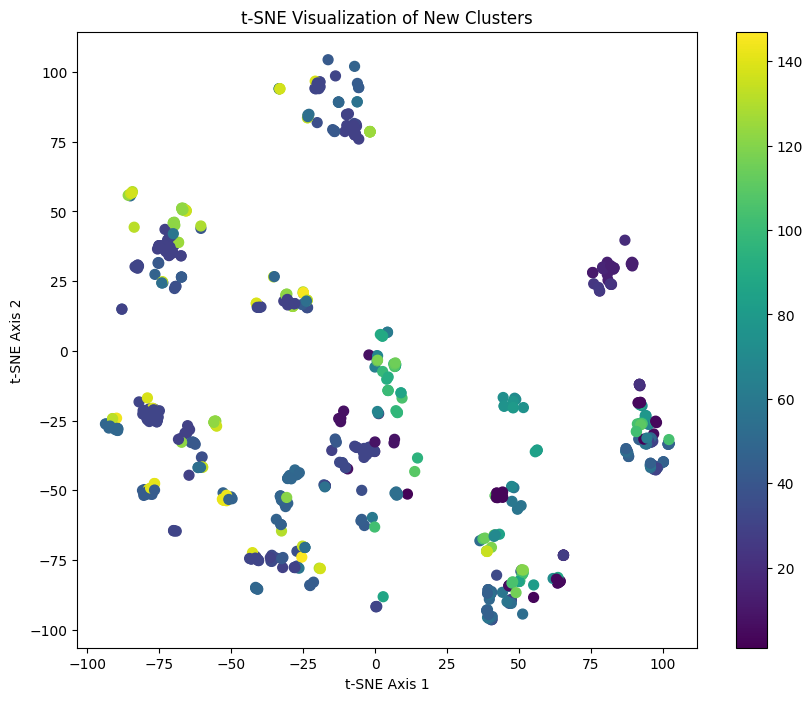

In [155]:
# Visualization of resulting final clusters
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'nlp_md' was previously loaded and used to create the embeddings
# Combine the embeddings into a single matrix for t-SNE
embeddings = np.hstack([
    np.vstack(final_df['subject_bert_embeddings']),
    np.vstack(final_df['verb_bert_embeddings']),
    np.vstack(final_df['object_bert_embeddings'])
])
# Initialize and apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create a scatter plot of the t-SNE results, color-coded by the "clusters_final" column
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=final_df['clusters_final'], cmap='viridis', s=50)
plt.colorbar(scatter)
#sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=filtered_df['clusters_final'], palette='viridis', legend='full')
plt.title('t-SNE Visualization of New Clusters')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.show()

In [156]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

filtered_df_no_nan = final_df.dropna(subset=['clusters_final'])

# Combine the embeddings into a single matrix for t-SNE
embeddings_no_nan = np.hstack([filtered_df_no_nan['subject_bert_embeddings'].tolist(), 
                               filtered_df_no_nan['verb_bert_embeddings'].tolist(), 
                               filtered_df_no_nan['object_bert_embeddings'].tolist()])

# Get the clusters without NaN
clusters_no_nan = filtered_df_no_nan['clusters_final']

# Calculate silhouette score
silhouette_avg = silhouette_score(embeddings_no_nan, clusters_no_nan)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin index
davies_bouldin_avg = davies_bouldin_score(embeddings_no_nan, clusters_no_nan)
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")

Silhouette Score: -0.05774867907166481
Davies-Bouldin Index: 1.4047294492508533


In [157]:
print(final_df['subject_clusters'].nunique())
print(final_df['verb_clusters'].nunique())
print(final_df['object_clusters'].nunique())

5
12
6


In [158]:
# Which subject clusters are connected to which verb clusters:
import pandas as pd

# Create a DataFrame to check connections between subject clusters and verb clusters
bert_subject_verb_connections = pd.crosstab(final_df['subject_clusters'], final_df['verb_clusters'])
bert_subject_verb_connections = (bert_subject_verb_connections > 0).astype(int)  # Convert to 1 if any connection exists, else 0

# Create a DataFrame to check connections between verb clusters and object clusters
bert_verb_object_connections = pd.crosstab(final_df['verb_clusters'], final_df['object_clusters'])
bert_verb_object_connections = (bert_verb_object_connections > 0).astype(int)  # Convert to 1 if any connection exists, else 0

# Print to see the DataFrame summary
print("Subject-Verb Connections:")
print(bert_subject_verb_connections)
print("\nVerb-Object Connections:")
print(bert_verb_object_connections)

Subject-Verb Connections:
verb_clusters     -1.0    1.0    2.0    3.0    4.0    5.0    9.0    10.0  \
subject_clusters                                                           
-1.0                  1      1      1      1      1      1      1      1   
 0.0                  1      1      1      1      1      1      1      1   
 5.0                  1      1      1      1      1      1      1      1   
 13.0                 1      1      1      1      1      1      1      1   
 14.0                 1      1      1      1      1      1      1      1   

verb_clusters      11.0   12.0   13.0   14.0  
subject_clusters                              
-1.0                  1      1      1      1  
 0.0                  1      1      1      1  
 5.0                  1      1      1      1  
 13.0                 1      1      1      1  
 14.0                 1      1      1      1  

Verb-Object Connections:
object_clusters  -1.0   2.0   4.0   5.0   6.0   7.0
verb_clusters                     

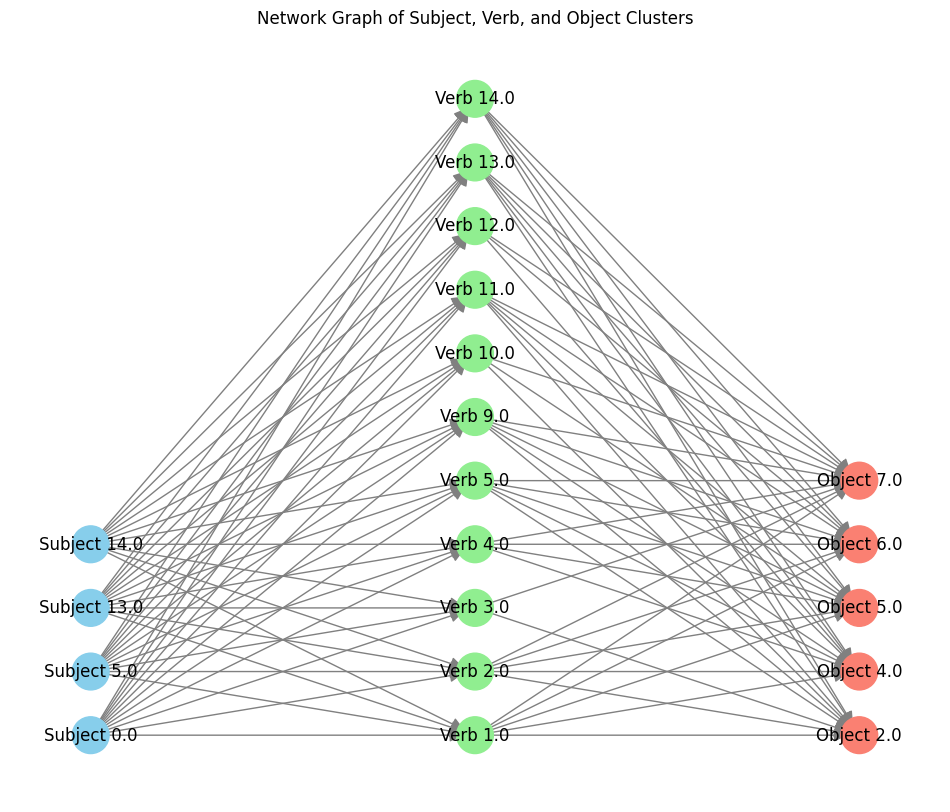

In [159]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Exclude -1 and add nodes for subject clusters
subject_nodes = {f"Subject {i}": (1, i) for i in bert_subject_verb_connections.index if i != -1}
G.add_nodes_from(subject_nodes.keys(), type='subject')

# Exclude -1 and add nodes for verb clusters
verb_nodes = {f"Verb {i}": (2, i) for i in bert_verb_object_connections.index.union(bert_subject_verb_connections.columns) if i != -1}
G.add_nodes_from(verb_nodes.keys(), type='verb')

# Exclude -1 and add nodes for object clusters
object_nodes = {f"Object {i}": (3, i) for i in bert_verb_object_connections.columns if i != -1}
G.add_nodes_from(object_nodes.keys(), type='object')

# Add edges from subject to verb clusters based on the subject_verb_connections DataFrame, excluding -1
for subject, verb, connected in bert_subject_verb_connections.stack().reset_index().values:
    if connected and subject != -1 and verb != -1:
        G.add_edge(f"Subject {subject}", f"Verb {verb}")

# Add edges from verb to object clusters based on the verb_object_connections DataFrame, excluding -1
for verb, obj, connected in bert_verb_object_connections.stack().reset_index().values:
    if connected and verb != -1 and obj != -1:
        G.add_edge(f"Verb {verb}", f"Object {obj}")

# Set positions for nodes explicitly
pos = {}
pos.update((node, (1, idx)) for idx, node in enumerate(subject_nodes.keys()))
pos.update((node, (2, idx)) for idx, node in enumerate(verb_nodes.keys()))
pos.update((node, (3, idx)) for idx, node in enumerate(object_nodes.keys()))

# Create a color map based on the node type
color_map = [ 'skyblue' if G.nodes[node]['type'] == 'subject'
              else 'lightgreen' if G.nodes[node]['type'] == 'verb'
              else 'salmon' for node in G]

# Plotting
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=700)
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, {node: node for node in G}, font_size=12)
plt.title('Network Graph of Subject, Verb, and Object Clusters')
plt.axis('off')  # Hide the axes
plt.show()

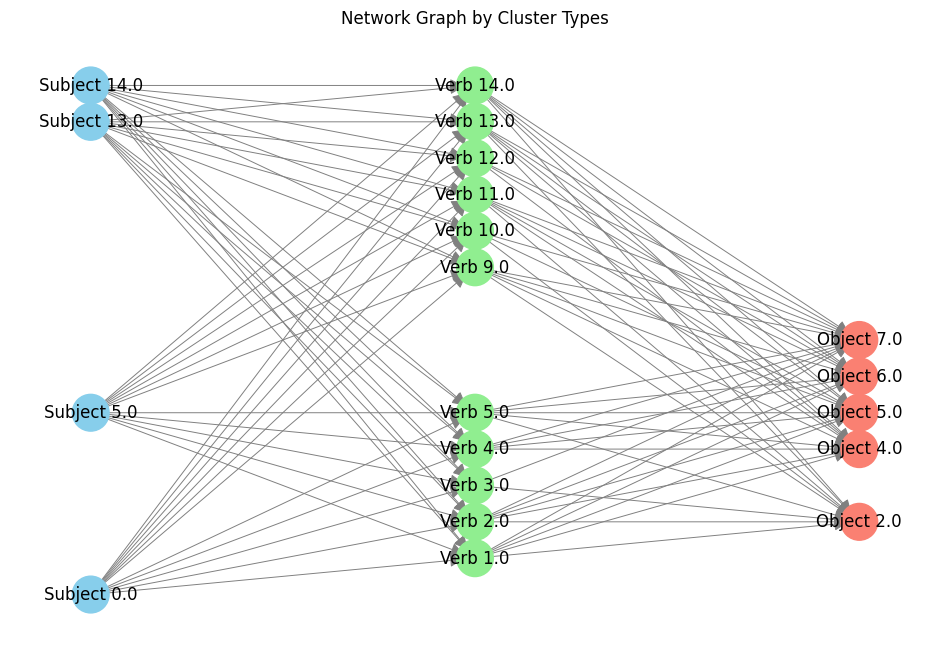

In [160]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the directed graph
G = nx.DiGraph()

# Add nodes for each type of cluster (excluding -1 clusters)
for s in bert_subject_verb_connections.index:
    if s != -1:
        G.add_node(f"Subject {s}", type='subject', pos=(1, s))
for v in bert_verb_object_connections.index.union(bert_subject_verb_connections.columns):
    if v != -1:
        G.add_node(f"Verb {v}", type='verb', pos=(2, v))
for o in bert_verb_object_connections.columns:
    if o != -1:
        G.add_node(f"Object {o}", type='object', pos=(3, o))

# Add edges with weights for subject to verb
for subject, row in bert_subject_verb_connections.iterrows():
    if subject != -1:
        for verb, weight in row.items():  # Using items() instead of iteritems()
            if verb != -1 and weight > 0:
                G.add_edge(f"Subject {subject}", f"Verb {verb}", weight=weight)

# Add edges with weights for verb to object
for verb, row in bert_verb_object_connections.iterrows():
    if verb != -1:
        for obj, weight in row.items():
            if obj != -1 and weight > 0:
                G.add_edge(f"Verb {verb}", f"Object {obj}", weight=weight)

# Node positions and colors as previously defined
pos = {node: (x, y) for node, attr in G.nodes(data=True) for x, y in [attr['pos']]}
color_map = ['skyblue' if data['type'] == 'subject' else 'lightgreen' if data['type'] == 'verb' else 'salmon' for node, data in G.nodes(data=True)]

# Plotting
plt.figure(figsize=(12, 8))
edges = G.edges(data=True)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[min(5, 0.5 + data['weight']/5) for _, _, data in edges], arrowstyle='-|>', arrowsize=20, edge_color='gray')
plt.title('Network Graph by Cluster Types')
plt.axis('off')
plt.show()


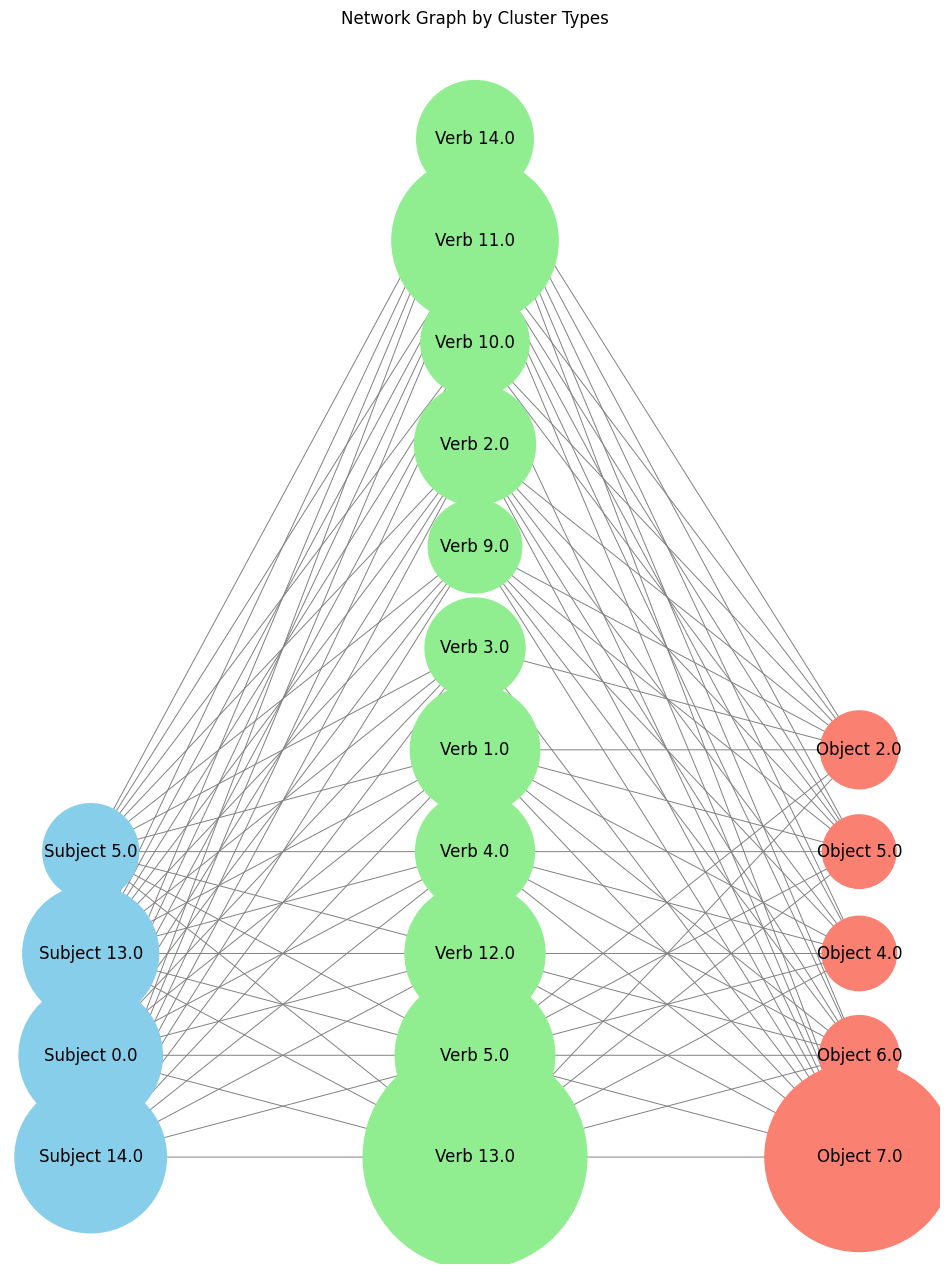

In [161]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)

# Function to calculate TF-IDF scores for clusters
def calculate_tfidf_for_clusters(df, cluster_col, text_col):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df[text_col])
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=1)
    
    # Create a DataFrame for TF-IDF scores
    tfidf_df = pd.DataFrame(tfidf_scores, columns=['TF-IDF'])
    tfidf_df['Cluster'] = df[cluster_col].values
    
    # Group by clusters and sum the TF-IDF scores
    cluster_tfidf = tfidf_df.groupby('Cluster')['TF-IDF'].sum().reset_index()
    
    return cluster_tfidf

# Calculate the number of points in each cluster
def calculate_cluster_sizes(df, cluster_col):
    cluster_sizes = df[cluster_col].value_counts().reset_index()
    cluster_sizes.columns = ['Cluster', 'Size']
    return cluster_sizes

# Calculate TF-IDF scores for each cluster
bert_subject_tfidf = calculate_tfidf_for_clusters(final_df, 'subject_clusters', 'Subject')
bert_verb_tfidf = calculate_tfidf_for_clusters(final_df, 'verb_clusters', 'Verb')
bert_object_tfidf = calculate_tfidf_for_clusters(final_df, 'object_clusters', 'Object')

# Calculate the sizes for each cluster
subject_cluster_sizes = calculate_cluster_sizes(final_df, 'subject_clusters')
verb_cluster_sizes = calculate_cluster_sizes(final_df, 'verb_clusters')
object_cluster_sizes = calculate_cluster_sizes(final_df, 'object_clusters')

# Sort clusters by TF-IDF scores
bert_subject_tfidf_sorted = bert_subject_tfidf.sort_values(by='TF-IDF', ascending=False)
bert_verb_tfidf_sorted = bert_verb_tfidf.sort_values(by='TF-IDF', ascending=False)
bert_object_tfidf_sorted = bert_object_tfidf.sort_values(by='TF-IDF', ascending=False)

# Initialize the directed graph
G = nx.DiGraph()

# Create position dictionaries for nodes
subject_pos = {f"Subject {cluster}": (1, i) for i, cluster in enumerate(bert_subject_tfidf_sorted['Cluster'].values)}
verb_pos = {f"Verb {cluster}": (2, i) for i, cluster in enumerate(bert_verb_tfidf_sorted['Cluster'].values)}
object_pos = {f"Object {cluster}": (3, i) for i, cluster in enumerate(bert_object_tfidf_sorted['Cluster'].values)}

# Combine all positions
pos = {**subject_pos, **verb_pos, **object_pos}

# Add nodes for each type of cluster (excluding -1 clusters)
for s in bert_subject_tfidf_sorted['Cluster']:
    if s != -1:
        size = subject_cluster_sizes.loc[subject_cluster_sizes['Cluster'] == s, 'Size'].values[0]
        G.add_node(f"Subject {s}", type='subject', size=size)
for v in bert_verb_tfidf_sorted['Cluster']:
    if v != -1:
        size = verb_cluster_sizes.loc[verb_cluster_sizes['Cluster'] == v, 'Size'].values[0]
        G.add_node(f"Verb {v}", type='verb', size=size)
for o in bert_object_tfidf_sorted['Cluster']:
    if o != -1:
        size = object_cluster_sizes.loc[object_cluster_sizes['Cluster'] == o, 'Size'].values[0]
        G.add_node(f"Object {o}", type='object', size=size)

# Add edges with weights for subject to verb
for subject, row in bert_subject_verb_connections.iterrows():
    if subject != -1:
        for verb, weight in row.items():
            if verb != -1 and weight > 0:
                G.add_edge(f"Subject {subject}", f"Verb {verb}", weight=weight)

# Add edges with weights for verb to object
for verb, row in bert_verb_object_connections.iterrows():
    if verb != -1:
        for obj, weight in row.items():
            if obj != -1 and weight > 0:
                G.add_edge(f"Verb {verb}", f"Object {obj}", weight=weight)

# Define color map for nodes
color_map = ['skyblue' if G.nodes[node]['type'] == 'subject' else 'lightgreen' if G.nodes[node]['type'] == 'verb' else 'salmon' for node in G.nodes]

# Define size map for nodes based on the size attribute
size_map = [G.nodes[node]['size'] * 10 for node in G.nodes]  # Scale the sizes for better visualization

# Plotting
plt.figure(figsize=(12, 16))
edges = G.edges(data=True)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=size_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[min(5, 0.5 + data['weight'] / 5) for _, _, data in edges], arrowstyle='-|>', arrowsize=20, edge_color='gray')
plt.title('Network Graph by Cluster Types')
plt.axis('off')
plt.show()

In [162]:
# Random examples for each cluster
import pandas as pd
import numpy as np

# Ensure reproducibility
np.random.seed(42)

# Function to sample 3 random examples from each cluster
def sample_cluster_representations(df, cluster_col, value_col):
    cluster_dict = {}
    grouped = df.groupby(cluster_col)
    
    for cluster, group in grouped:
        if cluster != -1:  # Exclude noise
            samples = group[value_col].sample(n=3, replace=False).tolist()
            cluster_dict[cluster] = samples
    
    return cluster_dict

# Assuming filtered_df has the columns 'Subject', 'Verb', 'Object' and corresponding cluster columns
subject_representatives = sample_cluster_representations(final_df, 'subject_clusters', 'Subject')
verb_representatives = sample_cluster_representations(final_df, 'verb_clusters', 'Verb')
object_representatives = sample_cluster_representations(final_df, 'object_clusters', 'Object')

# Print the dictionaries to check the results
print("Subject Representatives by Cluster:")
print(subject_representatives)
print("\nVerb Representatives by Cluster:")
print(verb_representatives)
print("\nObject Representatives by Cluster:")
print(object_representatives)


Subject Representatives by Cluster:
{0.0: ['government', 'government', 'government'], 5.0: ['minister', 'minister', 'minister'], 13.0: ['people', 'people', 'people'], 14.0: ['migrant', 'cameron', 'deal']}

Verb Representatives by Cluster:
{1.0: ['not meet', 'not have', 'not change'], 2.0: ['see', 'see', 'see'], 3.0: ['face', 'face', 'face'], 4.0: ['want', 'want', 'want'], 5.0: ['tell', 'tell', 'tell'], 9.0: ['leave', 'leave', 'leave'], 10.0: ['give', 'give', 'give'], 11.0: ['take', 'take', 'take'], 12.0: ['make', 'make', 'make'], 13.0: ['lodge', 'punish', 'deliver'], 14.0: ['get', 'get', 'get']}

Object Representatives by Cluster:
{2.0: ['we', 'we', 'we'], 4.0: ['people', 'people', 'people'], 5.0: ['people', 'people', 'people'], 6.0: ['migrant', 'refugee', 'migrant'], 7.0: ['contrast', 'obsession', 'stretch']}


In [163]:
# Examples for each cluster based on mutual info

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure reproducibility
np.random.seed(42)

def get_representative_words(df, cluster_col, value_col):
    cluster_dict = {}
    grouped = df.groupby(cluster_col)
    stop_words = set(TfidfVectorizer(stop_words='english').get_stop_words())

    for cluster, group in grouped:
        if cluster != -1:  # Exclude noise
            # Concatenate all words in the cluster into a single string
            words = group[value_col].astype(str).tolist()
            words_filtered = [word for word in words if word.lower() not in stop_words]
            
            if not words_filtered:
                # Handle clusters that only have stop words
                cluster_dict[cluster] = ["<only_stopwords>"]
                continue
            
            text = ' '.join(words_filtered)
            
            # Compute TF-IDF scores
            tfidf_vectorizer = TfidfVectorizer(stop_words='english')
            tfidf_matrix = tfidf_vectorizer.fit_transform([text])
            feature_names = tfidf_vectorizer.get_feature_names_out()
            # Get top 3 words with highest TF-IDF scores
            tfidf_scores = tfidf_matrix.toarray().flatten()
            top_indices = np.argsort(tfidf_scores)[-3:][::-1]
            top_words = [feature_names[idx] for idx in top_indices]
            cluster_dict[cluster] = top_words
    
    return cluster_dict

# Assuming filtered_df has the columns 'Subject', 'Verb', 'Object' and corresponding cluster columns
subject_representatives = get_representative_words(final_df, 'subject_clusters', 'Subject')
verb_representatives = get_representative_words(final_df, 'verb_clusters', 'Verb')
object_representatives = get_representative_words(final_df, 'object_clusters', 'Object')

# Print the dictionaries to check the results
print("Subject Representatives by Cluster:")
print(subject_representatives)
print("\nVerb Representatives by Cluster:")
print(verb_representatives)
print("\nObject Representatives by Cluster:")
print(object_representatives)


Subject Representatives by Cluster:
{0.0: ['government'], 5.0: ['minister'], 13.0: ['people', 'person'], 14.0: ['migrant', 'refugee', 'seeker']}

Verb Representatives by Cluster:
{1.0: ['make', 'accept', 'provide'], 2.0: ['<only_stopwords>'], 3.0: ['face'], 4.0: ['need', 'want'], 5.0: ['tell'], 9.0: ['leave'], 10.0: ['<only_stopwords>'], 11.0: ['<only_stopwords>'], 12.0: ['make', 'convince'], 13.0: ['reach', 'accuse', 'flee'], 14.0: ['<only_stopwords>']}

Object Representatives by Cluster:
{2.0: ['<only_stopwords>'], 4.0: ['people'], 5.0: ['people'], 6.0: ['migrant', 'refugee'], 7.0: ['seeker', 'crisis', 'investigation']}


In [88]:
# Labelling each cluster by closest points to the centroids
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

def compute_centroids(df, cluster_col, embedding_col):
    """
    Compute the centroid of each cluster.
    """
    centroids = df.groupby(cluster_col)[embedding_col].apply(np.mean).to_dict()
    return centroids

def find_closest_words(df, cluster_col, embedding_col, word_col, centroids, top_n=3):
    """
    Find the closest words to the centroids of each cluster.
    """
    closest_words = {}
    
    for cluster, centroid in centroids.items():
        cluster_df = df[df[cluster_col] == cluster]
        distances = cosine_distances([centroid], list(cluster_df[embedding_col]))[0]
        closest_indices = np.argsort(distances)[:top_n]
        closest_words[cluster] = cluster_df.iloc[closest_indices][word_col].tolist()
    
    return closest_words

# Assuming filtered_df has the columns 'Subject', 'Verb', 'Object', 'subject_clusters', 'verb_clusters', 'object_clusters'
# and corresponding embedding columns 'subject_embedding', 'verb_embedding', 'object_embedding'
subject_centroids = compute_centroids(final_df, 'subject_clusters', 'subject_bert_embeddings')
verb_centroids = compute_centroids(final_df, 'verb_clusters', 'verb_bert_embeddings')
object_centroids = compute_centroids(final_df, 'object_clusters', 'object_bert_embeddings')

subject_representatives = find_closest_words(final_df, 'subject_clusters', 'subject_bert_embeddings', 'Subject', subject_centroids)
verb_representatives = find_closest_words(final_df, 'verb_clusters', 'verb_bert_embeddings', 'Verb', verb_centroids)
object_representatives = find_closest_words(final_df, 'object_clusters', 'object_bert_embeddings', 'Object', object_centroids)

# Print the dictionaries to check the results
print("Subject Representatives by Cluster:")
print(subject_representatives)
print("\nVerb Representatives by Cluster:")
print(verb_representatives)
print("\nObject Representatives by Cluster:")
print(object_representatives)

Subject Representatives by Cluster:
{-1.0: ['humanity', 'citizen', 'citizen'], 0.0: ['biden', 'biden', 'biden'], 4.0: ['government', 'government', 'government'], 5.0: ['trump', 'trump', 'trump'], 6.0: ['israel', 'israel', 'israel'], 11.0: ['minister', 'minister', 'minister'], 12.0: ['britain', 'britain', 'britain'], 18.0: ['uk', 'uk', 'uk'], 21.0: ['people', 'people', 'people'], 22.0: ['people', 'people', 'people'], 23.0: ['court', 'court', 'court'], 25.0: ['colbert', 'carrier', 'intention'], 26.0: ['migrant', 'migrant', 'migrant']}

Verb Representatives by Cluster:
{-1.0: ['remove', 'remove', 'remove'], 0.0: ['lose', 'lose', 'lose'], 1.0: ['win', 'win', 'win'], 3.0: ['not deliver', 'not reach', 'not reach'], 5.0: ['find', 'find', 'find'], 6.0: ['call', 'call', 'call'], 7.0: ['receive', 'receive', 'receive'], 8.0: ['include', 'include', 'include'], 9.0: ['see', 'see', 'see'], 10.0: ['become', 'become', 'become'], 11.0: ['face', 'face', 'face'], 12.0: ['need', 'need', 'need'], 13.0: ['t

In [164]:
# Creating new clusters from the natural connections here

# Step 1: Create a new column for unique clusters
final_df['unique_bert_cluster'] = final_df.apply(lambda row: f"{row['subject_clusters']}_{row['verb_clusters']}_{row['object_clusters']}", axis=1)

# Step 2: Assign unique identifiers to each combination
unique_bert_clusters = final_df['unique_bert_cluster'].unique()
cluster_mapping = {cluster: idx + 1 for idx, cluster in enumerate(unique_clusters)}
final_df['combined_bert_clusters'] = final_df['unique_bert_cluster'].map(cluster_mapping)

In [165]:
# Step 3: Filter clusters that occur more than 5 times
cluster_counts = final_df['combined_bert_clusters'].value_counts()
clusters_to_keep = cluster_counts[cluster_counts > 5].index
final_df = final_df[final_df['combined_bert_clusters'].isin(clusters_to_keep)]

In [166]:
final_df['combined_bert_clusters'].nunique()

32

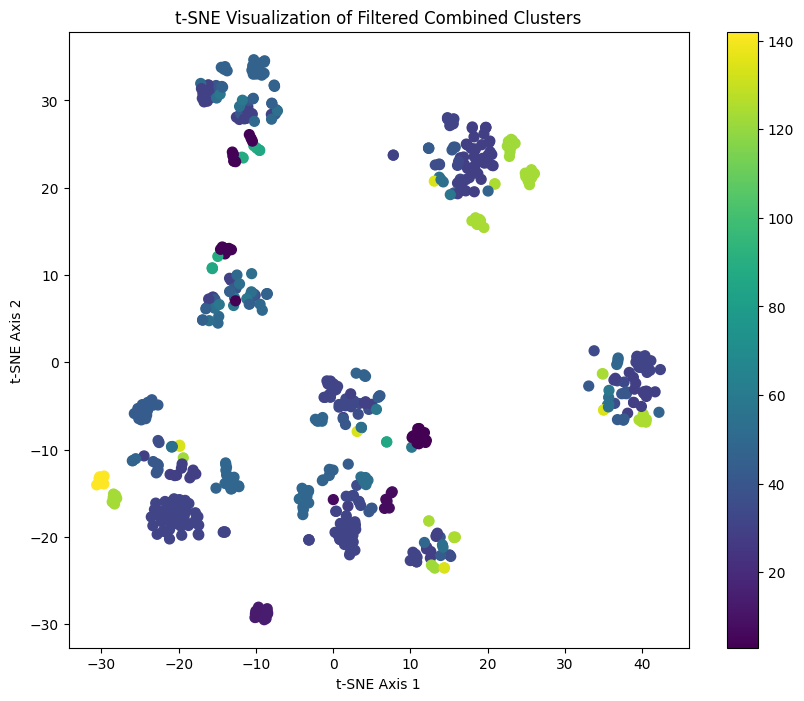

In [167]:
# Step 4: Visualize the filtered clusters
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Combine the embeddings into a single matrix for t-SNE
embeddings = np.hstack([final_df['subject_bert_embeddings'].tolist(), 
                        final_df['verb_bert_embeddings'].tolist(), 
                        final_df['object_bert_embeddings'].tolist()])

# Initialize and apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

# Create a scatter plot of the t-SNE results, color-coded by the combined clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=final_df['combined_bert_clusters'], cmap='viridis', s=50)
plt.colorbar(scatter)
plt.title('t-SNE Visualization of Filtered Combined Clusters')
plt.xlabel('t-SNE Axis 1')
plt.ylabel('t-SNE Axis 2')
plt.show()

In [168]:
# SS and DB for visualized clusters
from sklearn.metrics import silhouette_score, davies_bouldin_score

labels = final_df['combined_bert_clusters'].values

# Compute Silhouette score
silhouette_avg = silhouette_score(embeddings, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Compute Davies-Bouldin index
db_index = davies_bouldin_score(embeddings, labels)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.08045070618391037
Davies-Bouldin Index: 2.260804354831963


In [169]:
# Reset the display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')

In [170]:
# with random SVO samples
import pandas as pd

def calculate_combined_aggregations(df):
    # Group by 'combined_bert_clusters'
    grouped = df.groupby('combined_bert_clusters')
    
    # Extract random SVOs
    sample_svos = grouped['string_SVO'].apply(lambda s: ', '.join(s.sample(min(3, len(s)), replace=False)))

    # Calculate outlet proportions
    outlet_counts = grouped['Outlet'].value_counts(normalize=True).unstack(fill_value=0)
    outlet_proportions = outlet_counts.round(2)
    
    # Rename columns for clarity if specific outlets are known
    outlet_proportions.rename(columns={
        'telegraph': 'Telegraph Proportion',
        'guardian': 'Guardian Proportion',
        'both': 'Both Proportions'
    }, inplace=True)

    # Calculate sums for other specified columns
    sums = grouped[['EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions', 'Total_Count', 'n_articles']].sum()

    # Combine the results into a single DataFrame
    combined = outlet_proportions.join(sums)
    combined['Sample SVOs'] = sample_svos
    
    return combined.reset_index()

# Assuming final_df is your DataFrame with all necessary columns
result2_df = calculate_combined_aggregations(final_df)

In [172]:
# with top SVO samples
import pandas as pd

def calculate_combined_aggregations(df):
    # Group by 'combined_bert_clusters'
    grouped = df.groupby('combined_bert_clusters')
    
    # Get top 5 most frequent SVOs within each cluster
    top_svos = df.groupby('combined_bert_clusters')['string_SVO'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
    top_svos = top_svos.groupby('combined_bert_clusters').apply(lambda x: ', '.join(x.index.get_level_values(1))).rename('Top_5_SVOs')
    
    # Calculate outlet proportions
    outlet_counts = grouped['Outlet'].value_counts(normalize=True).unstack(fill_value=0)
    outlet_proportions = outlet_counts.round(2)
    
    # Rename columns for clarity if specific outlets are known
    outlet_proportions.rename(columns={
        'telegraph': 'Telegraph Proportion',
        'guardian': 'Guardian Proportion',
        'both': 'Both Proportions'
    }, inplace=True)

    # Calculate sums for other specified columns
    sums = grouped[['EU_Mentions', 'NonEU_Mentions', 'GN_Mentions', 'GS_Mentions', 'Total_Count', 'n_articles']].sum()

    # Combine the results into a single DataFrame
    combined = outlet_proportions.join(sums)
    combined['Top_5_SVOs'] = top_svos
    
    return combined.reset_index()

# Assuming final_df is your DataFrame with all necessary columns
result_dff = calculate_combined_aggregations(final_df)


In [173]:
result_dff

,combined_bert_clusters,Both Proportions,Guardian Proportion,Telegraph Proportion,EU_Mentions,NonEU_Mentions,GN_Mentions,GS_Mentions,Total_Count,n_articles,Top_5_SVOs
0,3.0,0.53,0.27,0.20,60,171,86,124,44,39,"brother tell i, colleague tell i, cousin tell ..."
1,4.0,0.26,0.58,0.16,71,191,123,93,41,37,"bryant do what, carlson do what, colleague do ..."
2,7.0,0.29,0.29,0.43,56,106,74,64,26,25,"crisis expose flaw, get require kind, investig..."
3,13.0,0.38,0.50,0.12,11,97,44,48,28,26,"government have ability, government have argum..."
4,14.0,0.33,0.33,0.33,21,75,32,50,18,18,"government ignore ruling, government impose re..."
5,29.0,0.52,0.35,0.14,217,816,380,468,184,172,"i appreciate stance, that affect ability, that..."
6,30.0,0.56,0.22,0.22,273,1138,509,596,209,197,"i appreciate that, i argue what, i avoid that,..."
7,31.0,0.69,0.17,0.14,647,2734,1315,1438,636,609,"i do kind, i do shift, i do utmost, i have abi..."
8,33.0,0.56,0.31,0.12,44,177,78,102,37,33,"i get concession, i get frustration, i get int..."
9,34.0,0.78,0.22,0.00,100,547,238,271,121,115,"i get i, i get that, i get what, that get i, w..."


In [98]:
# import pandas as pd
# # random samples
# # Assuming final_df is already loaded into the environment

# # Group the dataframe by the cluster labels
# grouped = final_df.groupby('combined_bert_clusters')

# # Function to extract random SVOs and calculate outlet proportions
# def extract_info(group):
#     sample_svos = ', '.join(group['string_SVO'].sample(3, replace=True if len(group) < 3 else False).tolist())
#     outlet_counts = group['Outlet'].value_counts(normalize=True)
#     return pd.DataFrame({
#         'Sample SVOs': [sample_svos],
#         'Telegraph Proportion': [outlet_counts.get('telegraph', 0)],
#         'Guardian Proportion': [outlet_counts.get('guardian', 0)],
#         'Both Proportions': [outlet_counts.get('both', 0)]
#     })

# # Apply the function to each cluster group
# result_df = grouped.apply(extract_info)
# result_df = result_df.reset_index(drop=True)
# result_df

/tmp/ipykernel_3004357/3619214903.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = grouped.apply(extract_info)


,Sample SVOs,Telegraph Proportion,Guardian Proportion,Both Proportions
0,"bryant do what, violent do that, addiction hav...",0.200000,0.600000,0.200000
1,"government have that, government do what, gove...",0.500000,0.000000,0.500000
2,"government have intention, government have int...",0.333333,0.166667,0.500000
3,"that require seeker, that require investigatio...",0.155556,0.355556,0.488889
4,"we allow that, we deserve what, which trouble i",0.255814,0.162791,0.581395
5,"i call what, he call he, we call that",0.000000,0.500000,0.500000
6,"that s flaw, that have relevance, which have s...",0.133929,0.160714,0.705357
7,"who draw attention, we draw attention, which d...",0.142857,0.714286,0.142857
8,"you find what, we find what, i find what",0.000000,0.250000,0.750000
9,"we get what, you get what, who get what",0.000000,0.300000,0.700000


In [99]:
# import pandas as pd
# # most frequenrt svos in each cluster
# # Assuming final_df is already loaded into the environment

# # Group the dataframe by the cluster labels
# grouped = final_df.groupby('combined_bert_clusters')

# # Function to extract top SVOs based on their frequency and calculate outlet proportions
# def extract_info(group):
#     # Sort the group by Total_Count (assumed to be a measure of frequency or importance) and pick the top 3
#     top_svos = group.sort_values('Total_Count', ascending=False).head(3)['string_SVO']
#     top_svos_str = ', '.join(top_svos.tolist())  # Join the top 3 SVOs into a single string, comma-separated

#     outlet_counts = group['Outlet'].value_counts(normalize=True)
    
#     return pd.DataFrame({
#         'Top SVOs': [top_svos_str],
#         'Telegraph Proportion': [outlet_counts.get('telegraph', 0)],
#         'Guardian Proportion': [outlet_counts.get('guardian', 0)],
#         'Both Proportions': [outlet_counts.get('both', 0)]
#     })

# # Apply the function to each cluster group
# result_df = grouped.apply(extract_info)
# result_df = result_df.reset_index(drop=True)
# result_df

/tmp/ipykernel_3004357/550683215.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = grouped.apply(extract_info)


,Top SVOs,Telegraph Proportion,Guardian Proportion,Both Proportions
0,"bryant do what, giles do that, harry do what",0.200000,0.600000,0.200000
1,"government do what, government do what, govern...",0.500000,0.000000,0.500000
2,"government have intention, government have pri...",0.333333,0.166667,0.500000
3,"who flee regime, that impose restriction, that...",0.155556,0.355556,0.488889
4,"you reach i, we deliver what, that remind i",0.255814,0.162791,0.581395
5,"we call what, i call what, you call what",0.000000,0.500000,0.500000
6,"we have discussion, we have crisis, that s kind",0.133929,0.160714,0.705357
7,"that draw attention, i draw attention, who dra...",0.142857,0.714286,0.142857
8,"i find what, we find what, you find i",0.000000,0.250000,0.750000
9,"we get that, we get what, you get what",0.000000,0.300000,0.700000


In [175]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [176]:
result_dff.to_csv('approach2_final')

In [177]:
final_df.to_csv('final_clusters_data')

In [12]:
import pandas as pd

df = pd.read_csv('final_clustered_data')

In [14]:
df.columns

Index(['Unnamed: 0', 'SVO', 'EU_Mentions', 'NonEU_Mentions', 'GN_Mentions',
       'GS_Mentions', 'Outlet', 'n_articles', 'Total_Count', 'Subject', 'Verb',
       'Object', 'Subject_Embedding', 'Verb_Embedding', 'Object_Embedding',
       'norm_subject_embedding', 'norm_verb_embedding',
       'norm_object_embedding', 'Subject_col', 'Verb_col', 'Object_col',
       'string_SVO_col', 'llm_string_embedding', 'string_normalized_embedding',
       'subject_bert_embeddings', 'verb_bert_embeddings',
       'object_bert_embeddings', 'norm_subject_bert_embedding',
       'norm_verb_bert_embedding', 'norm_object_bert_embedding',
       'hdb_string_clusters'],
      dtype='object')

In [16]:
filtered = df[df['hdb_string_clusters']!= -1]

In [18]:
filtered.to_csv('clusters_to_label.csv')